# House Sale Price Prediction
In this analysis, we aim to predict house sale prices using various features from the dataset. We have employed multiple preprocessing techniques, including feature engineering, ecoding, and scaling, to improve model performance.

the data consists of: 81 columns x 1460 entires represents the features of every house.

**Dataset Features:**

SalePrice - the property's sale price in dollars. This is the **target** variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

## Business KPI


* What is the relation between features and Sale Price

* What is the relation between the features

* Which month has the highest sales

* Is the type of sale affect on the sale price





# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('/content/train.csv')


In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
df.drop('Id', axis=1, inplace=True)

# EDA

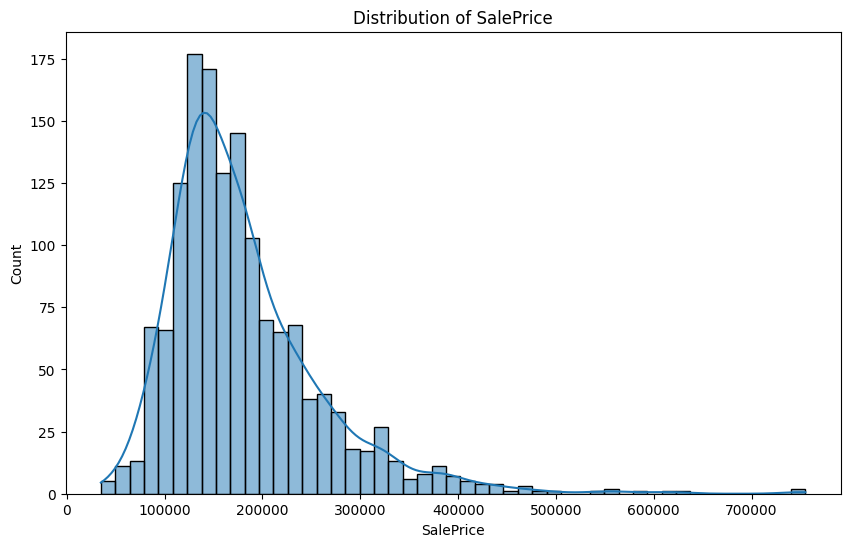

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


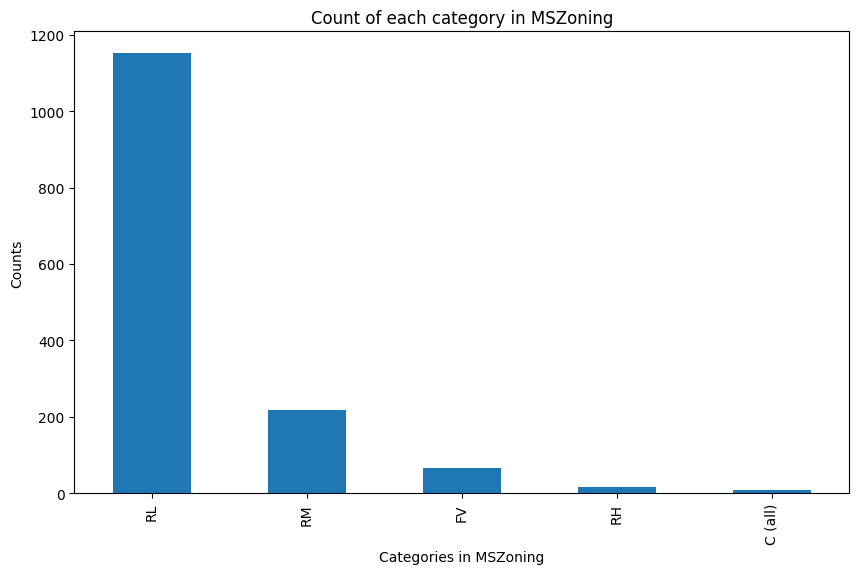

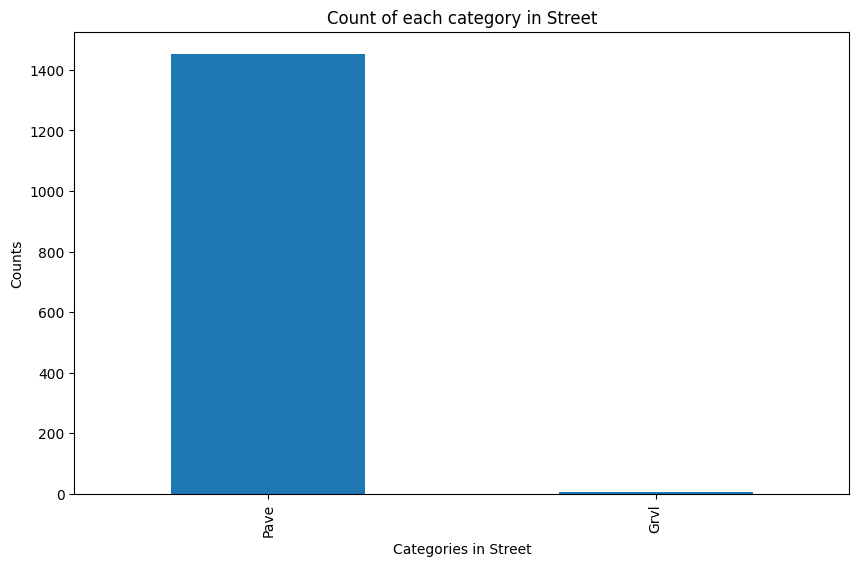

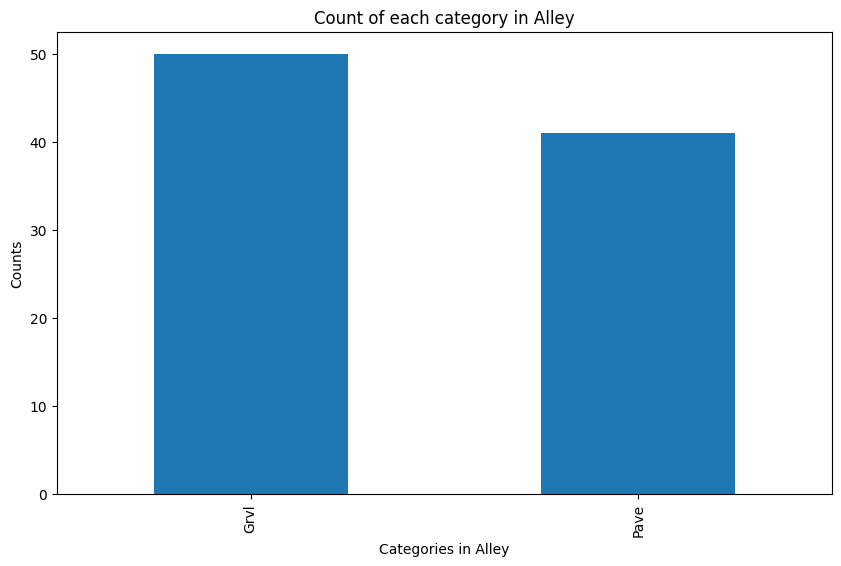

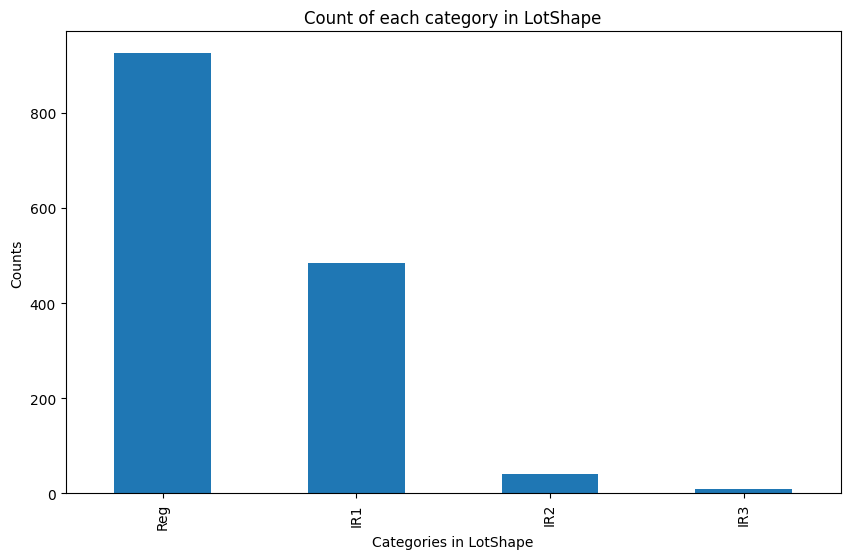

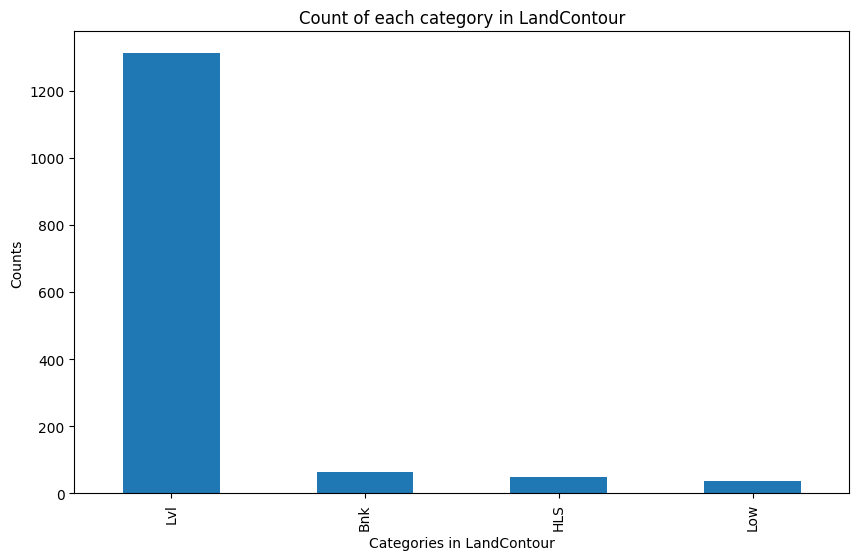

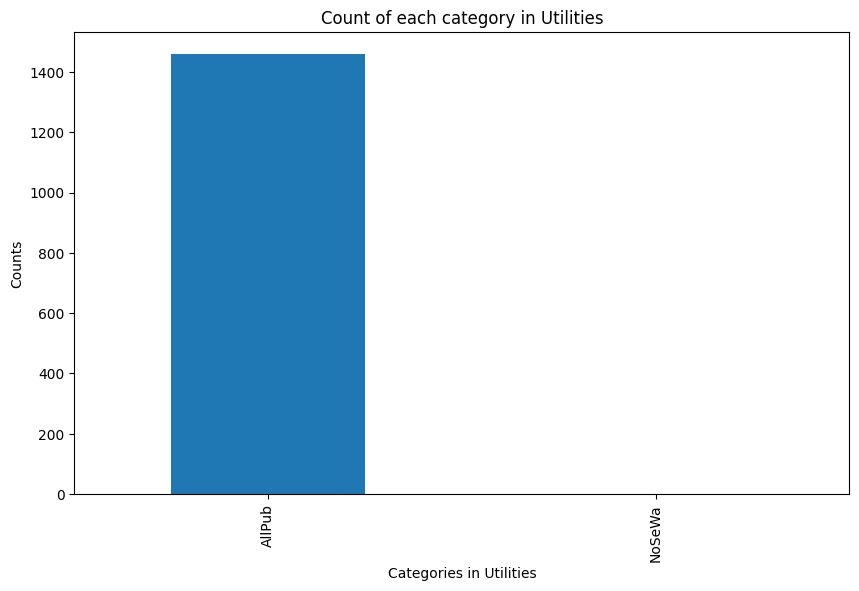

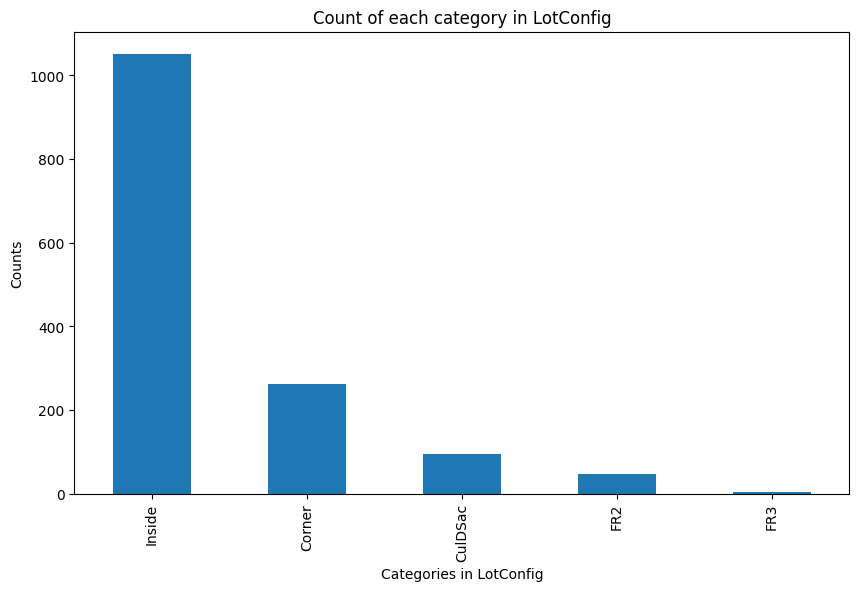

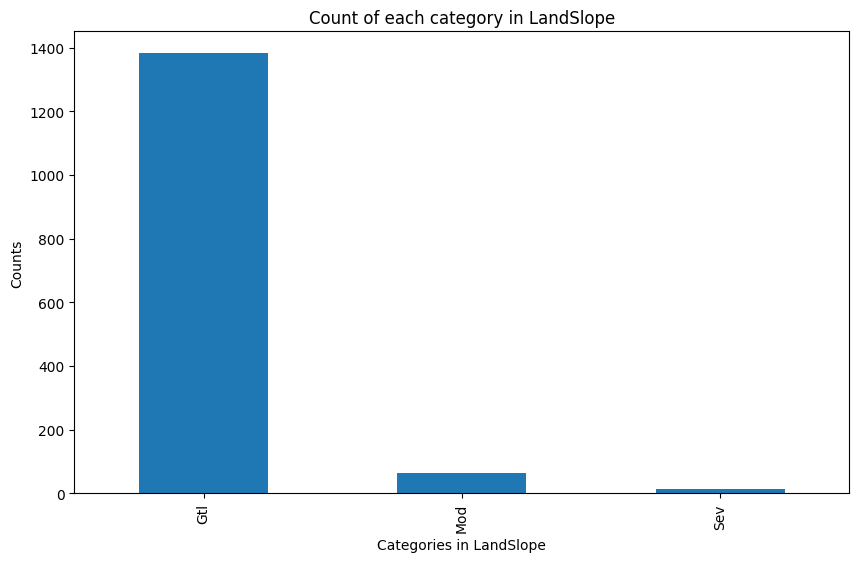

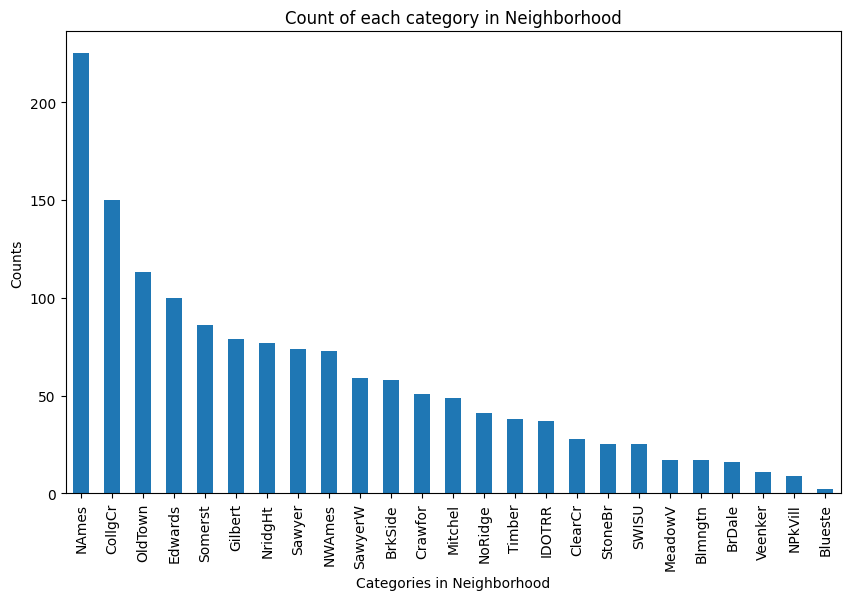

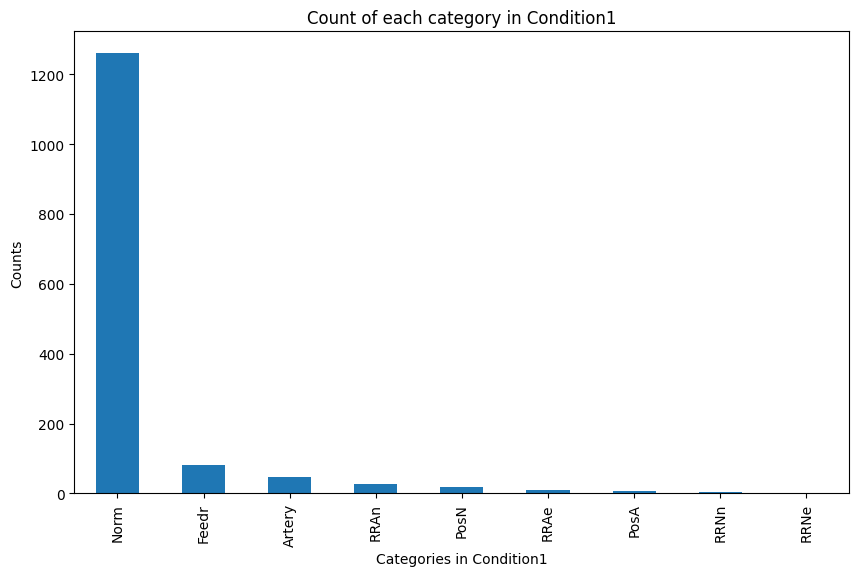

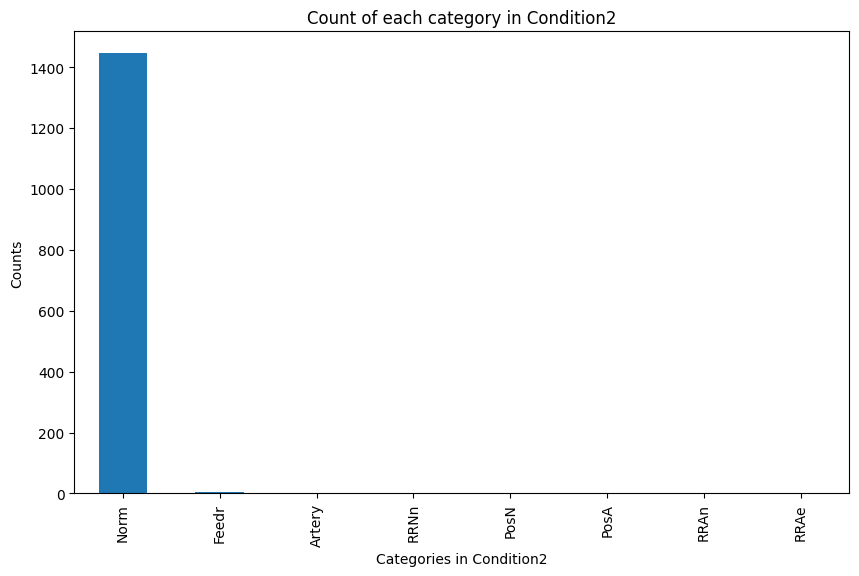

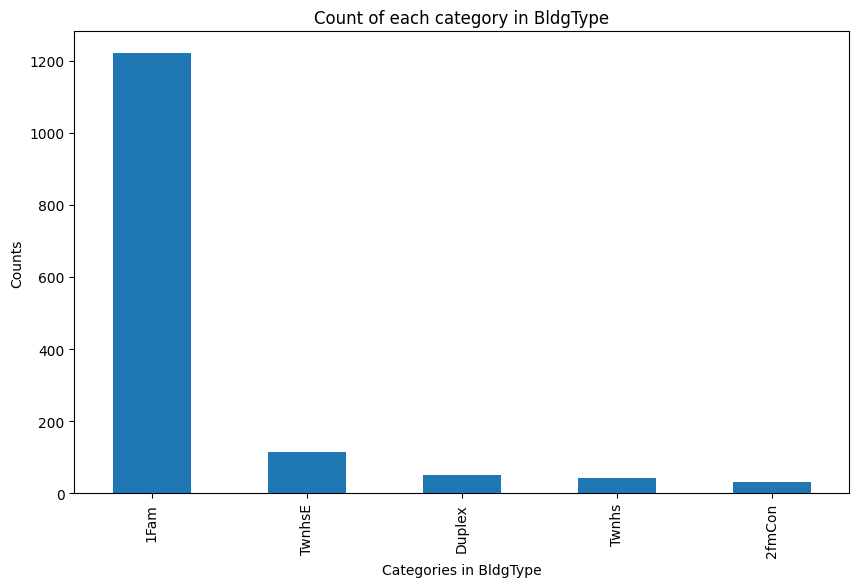

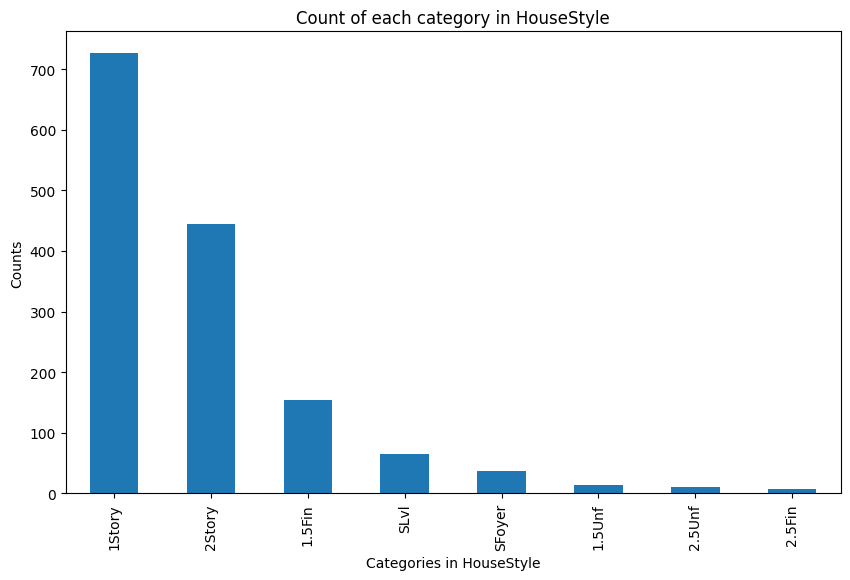

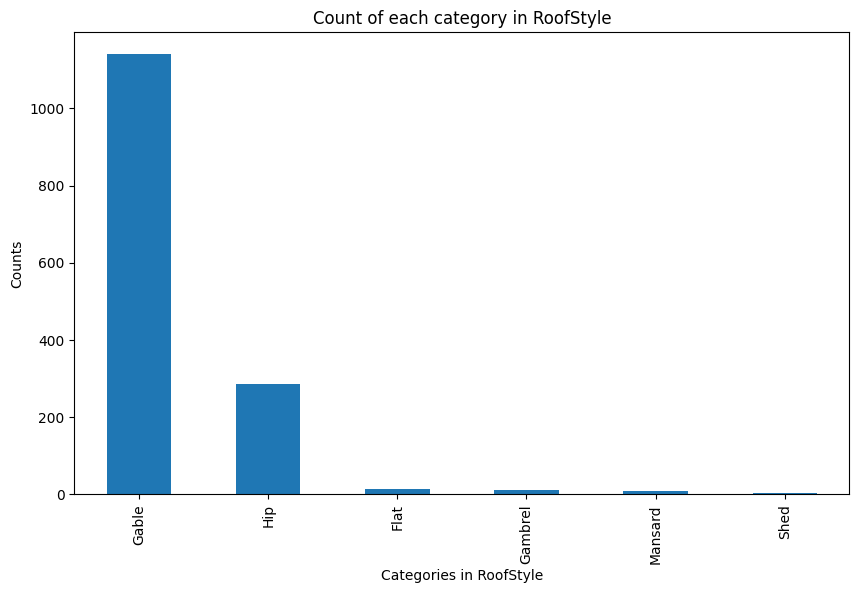

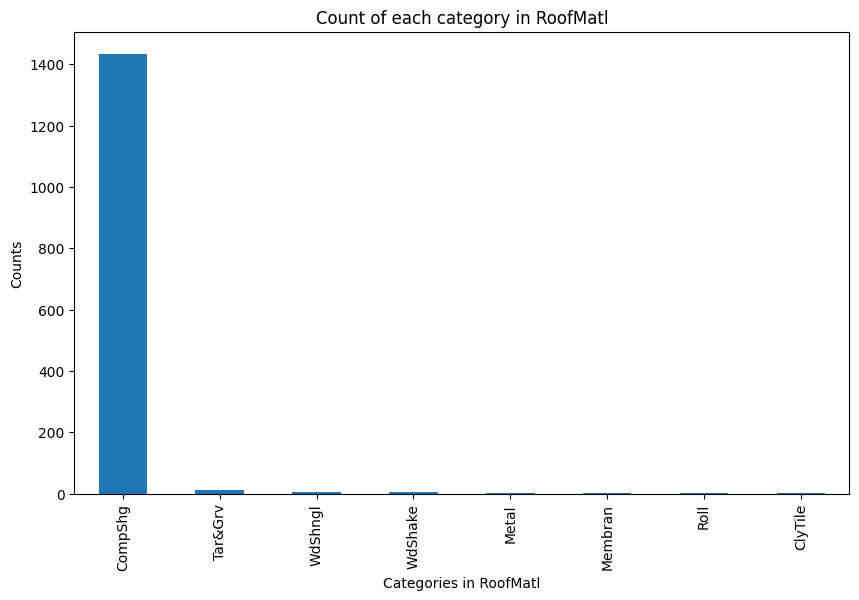

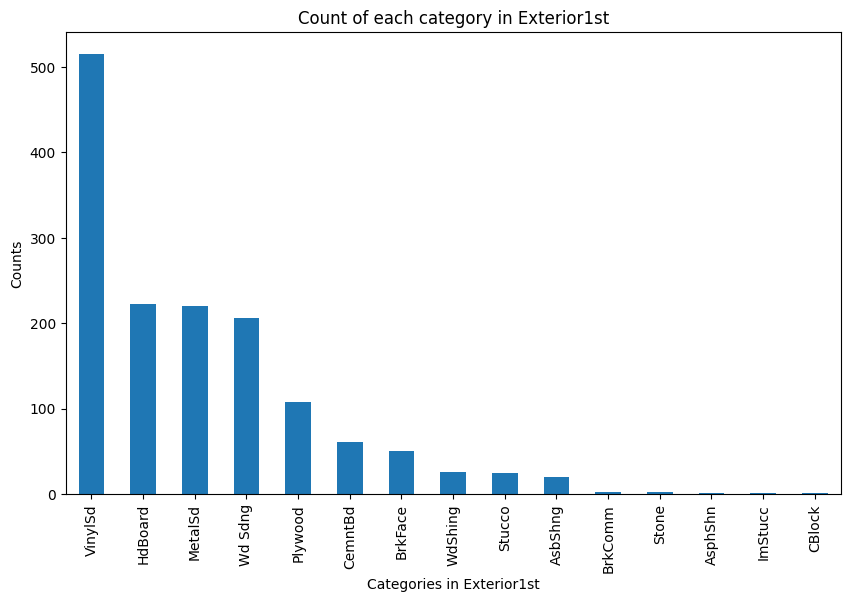

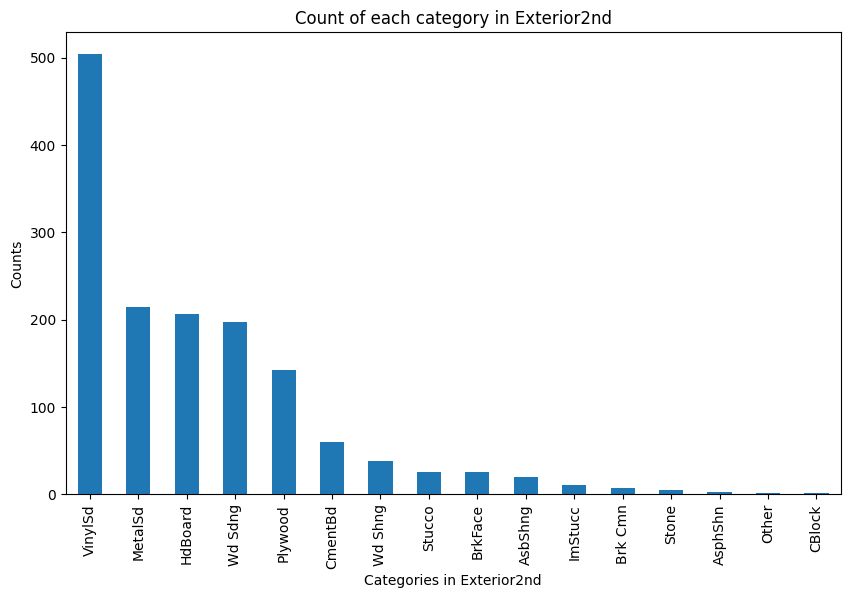

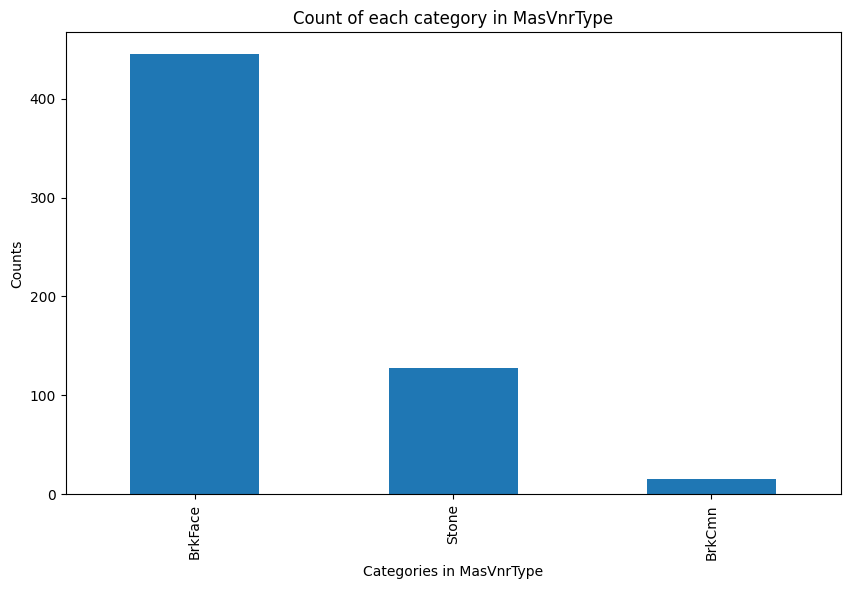

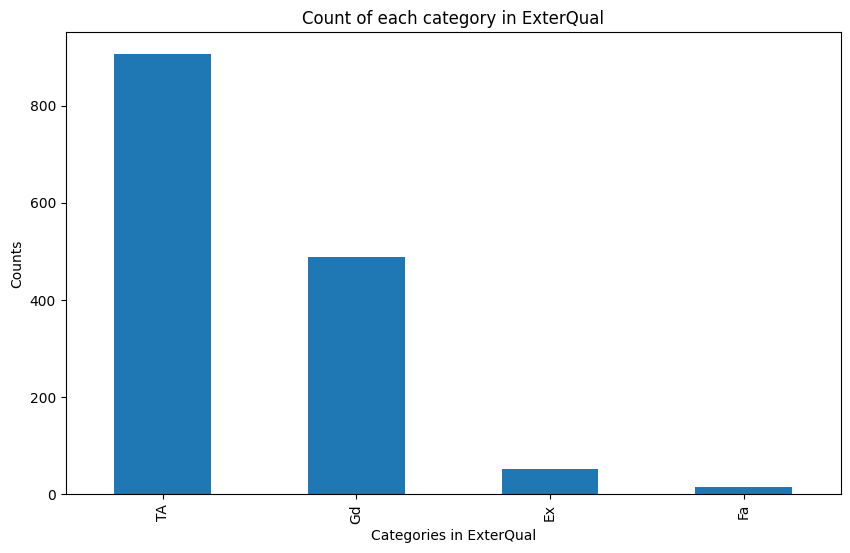

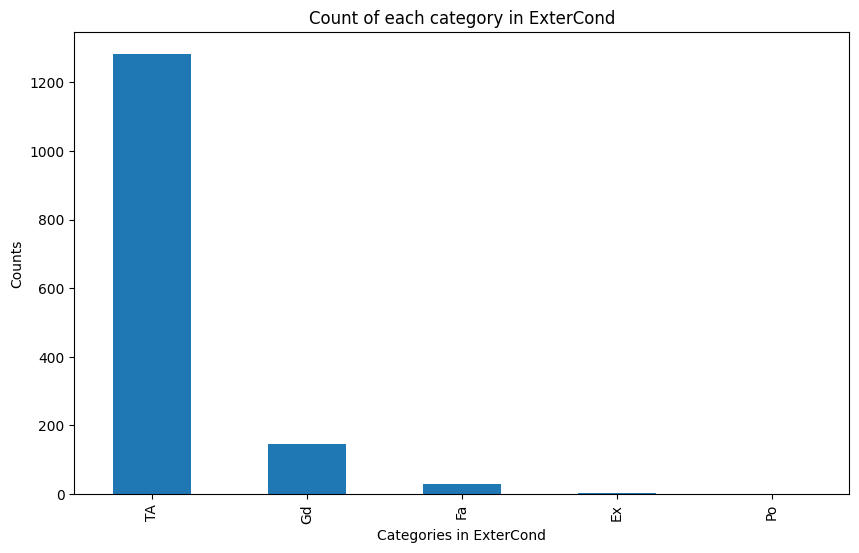

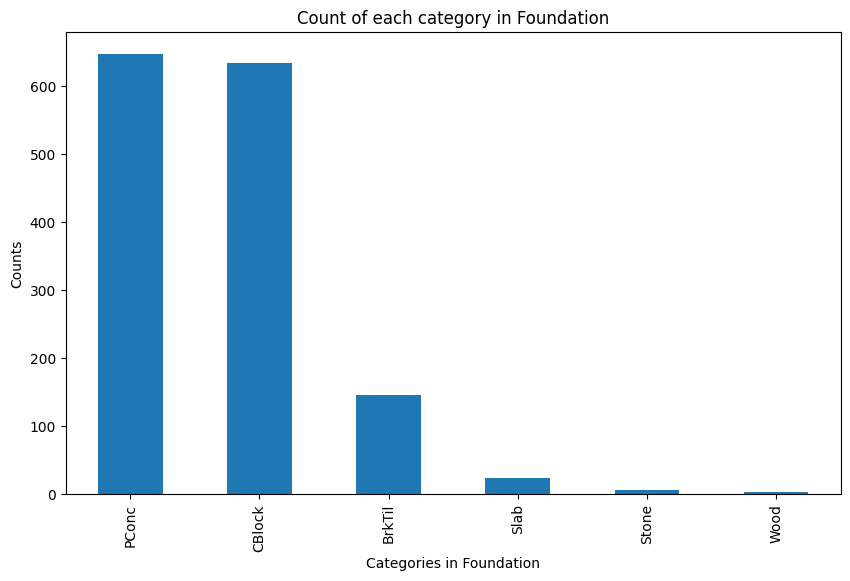

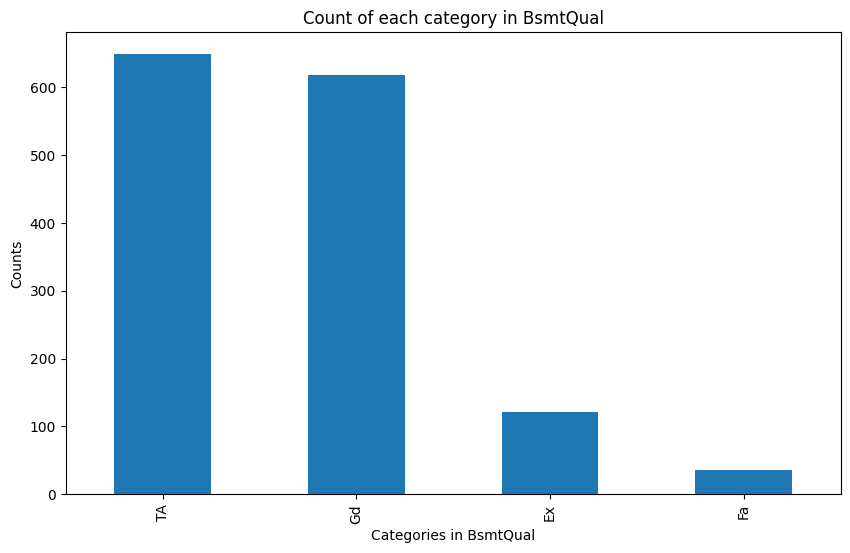

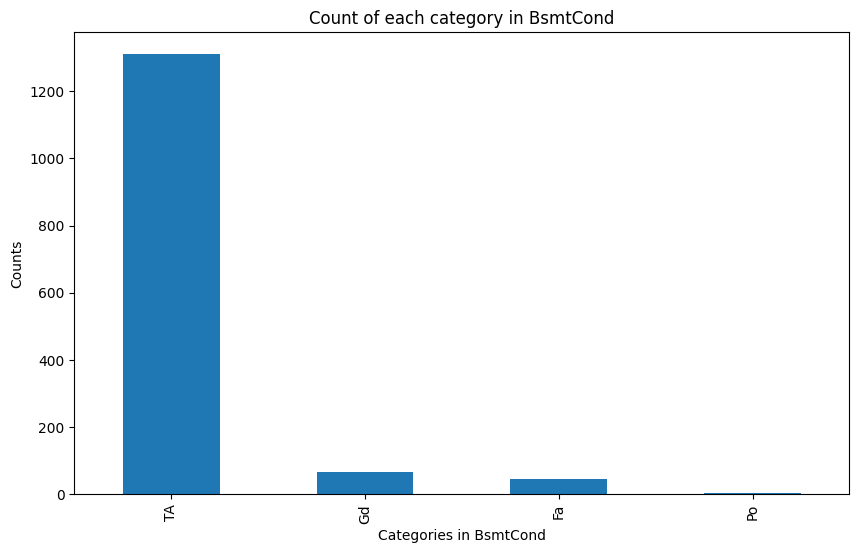

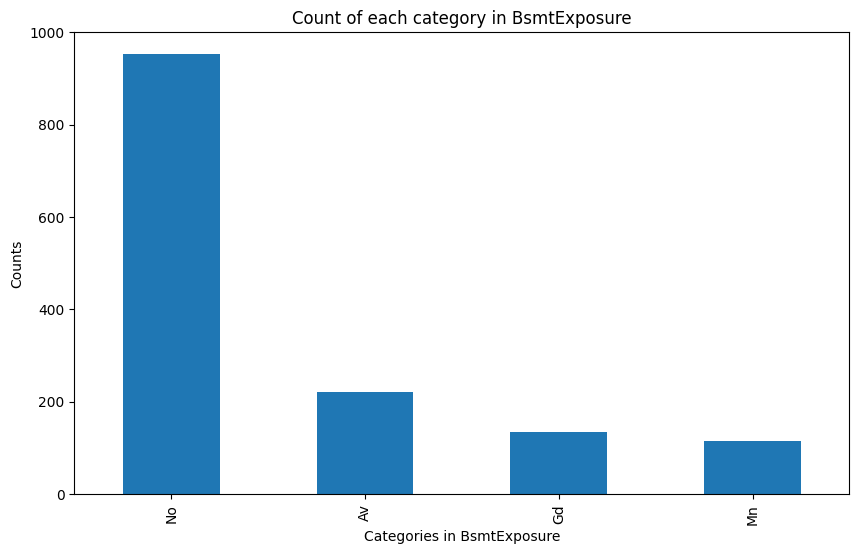

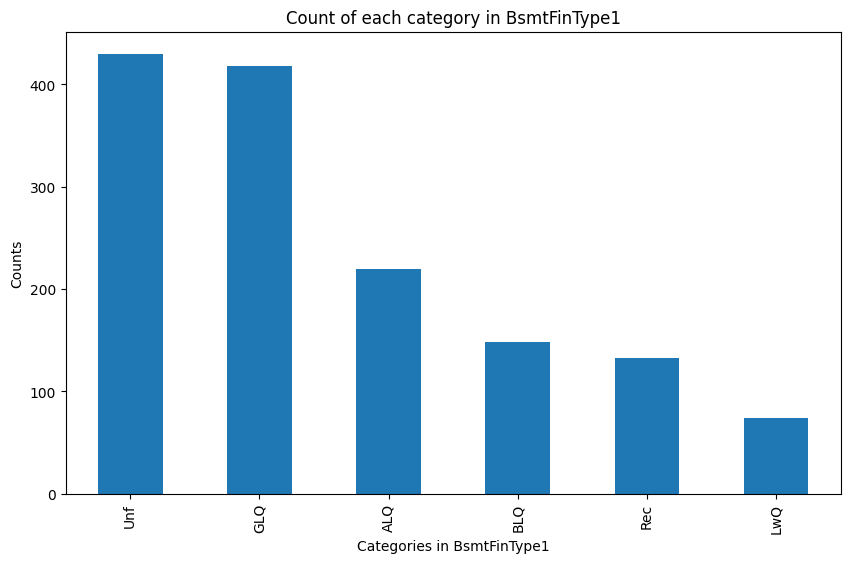

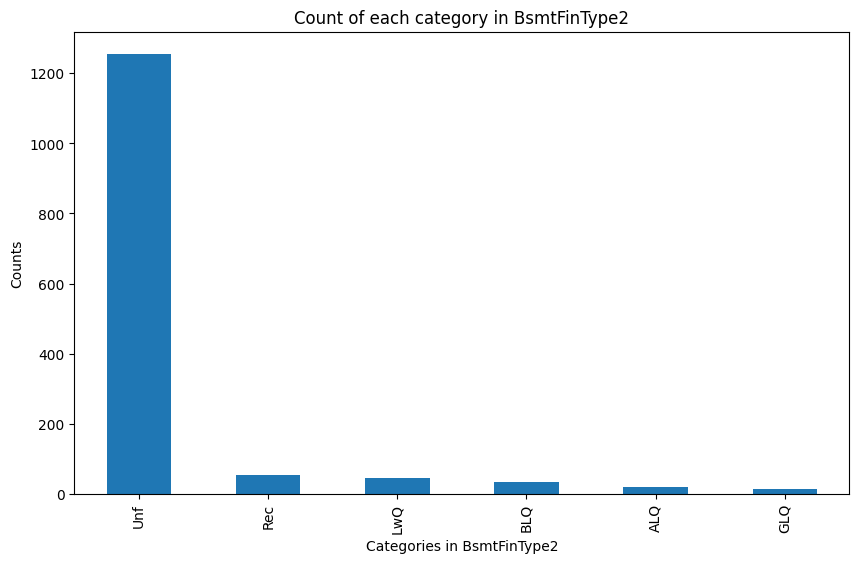

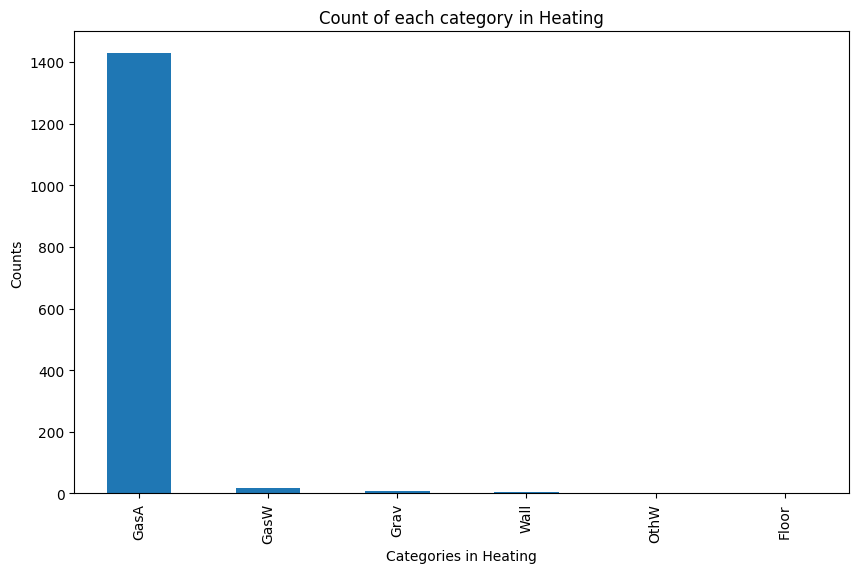

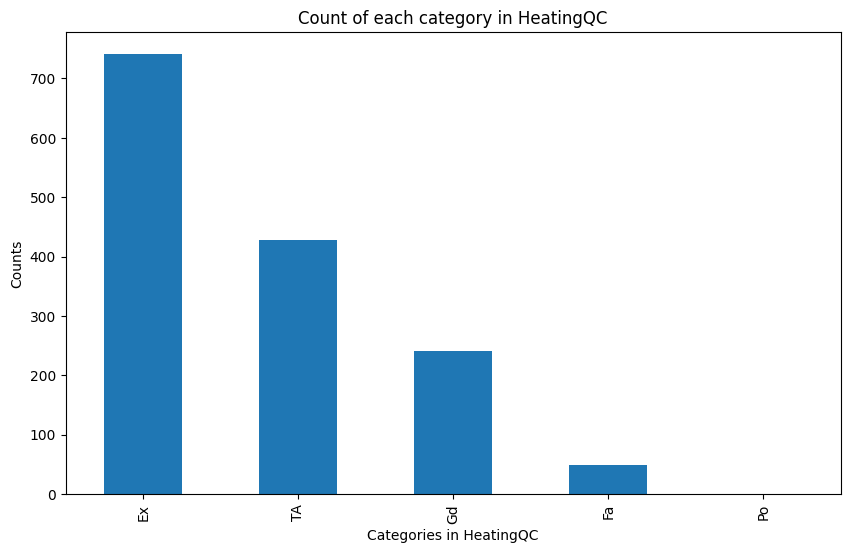

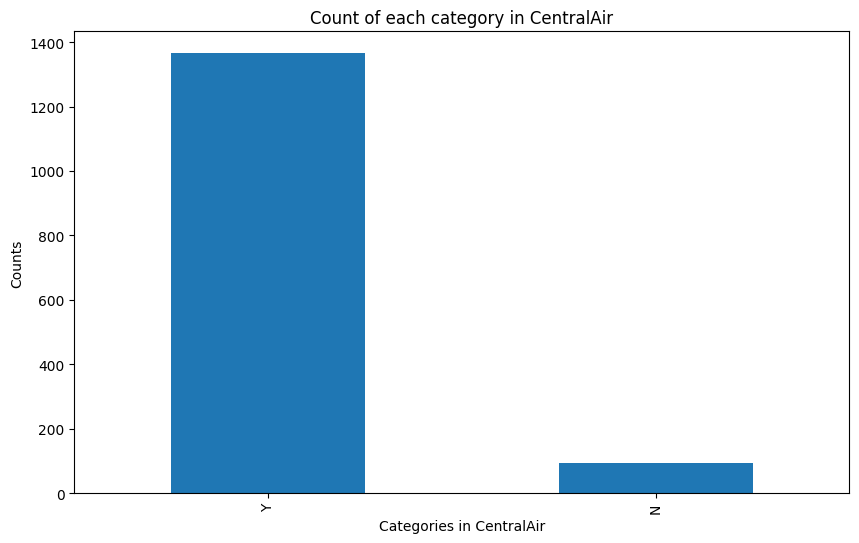

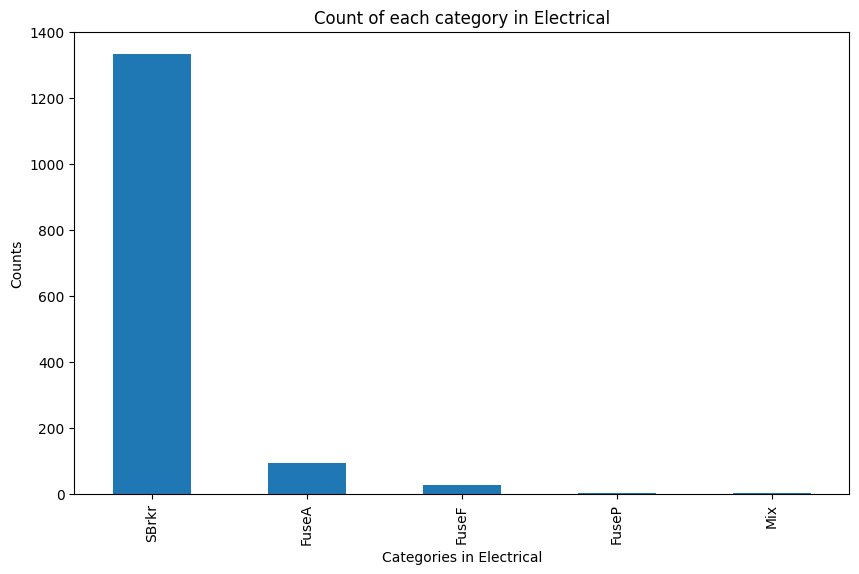

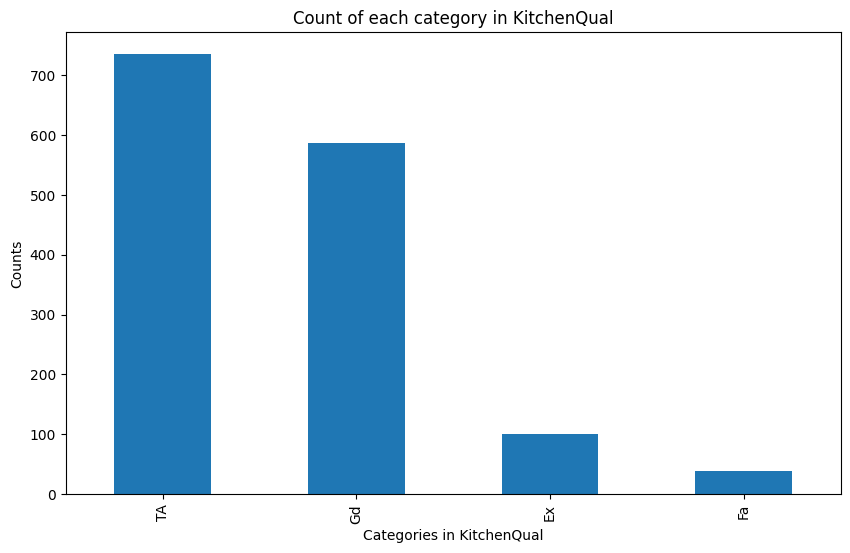

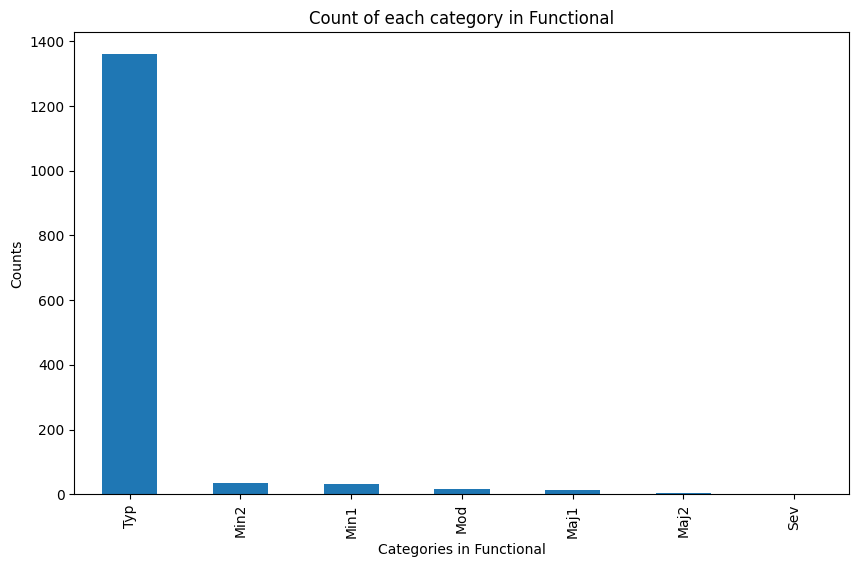

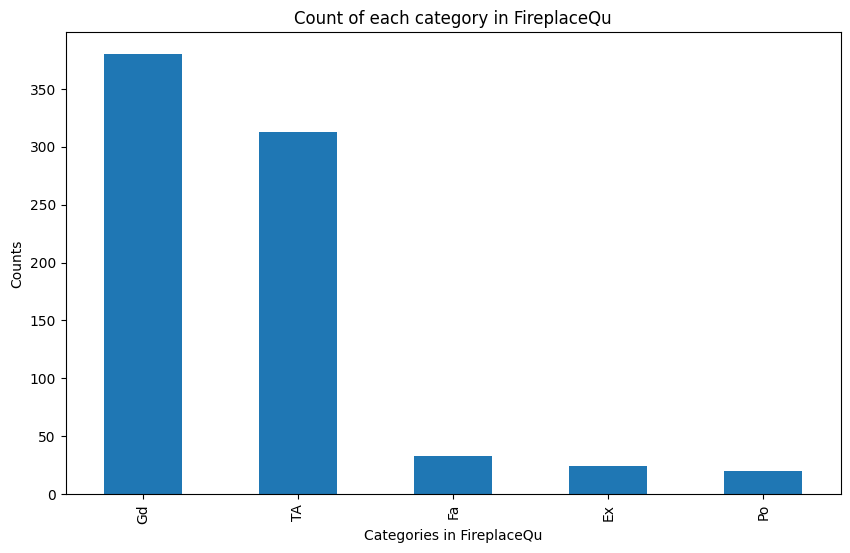

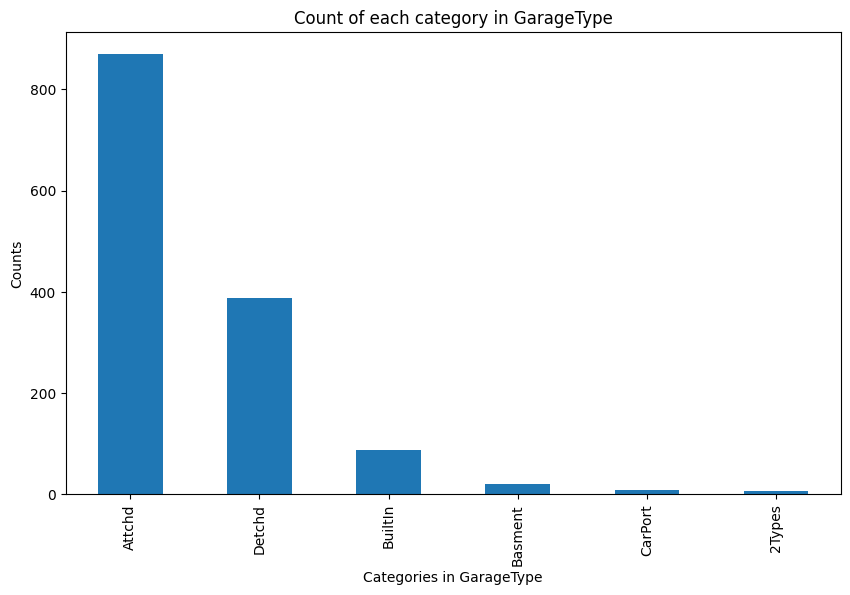

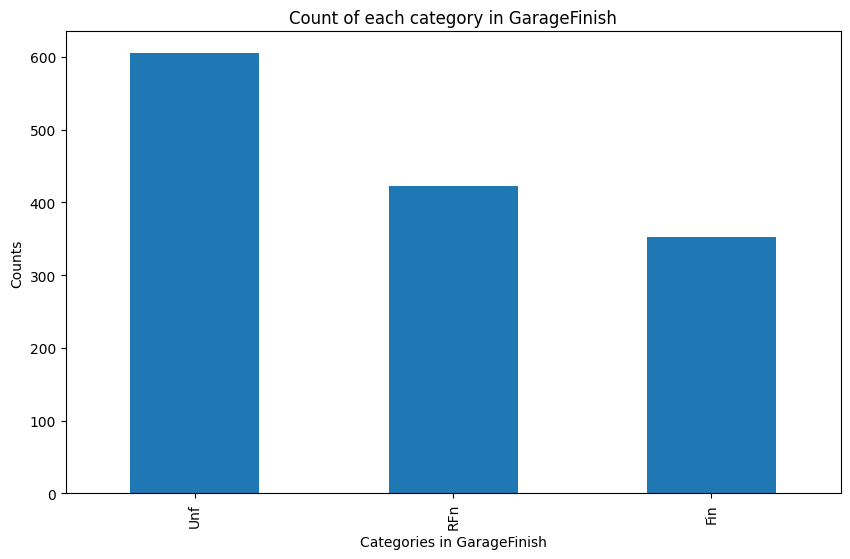

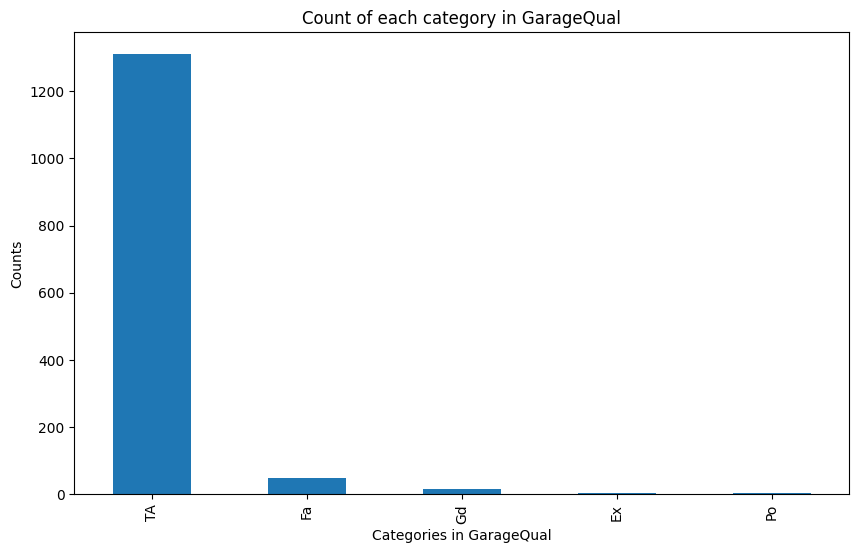

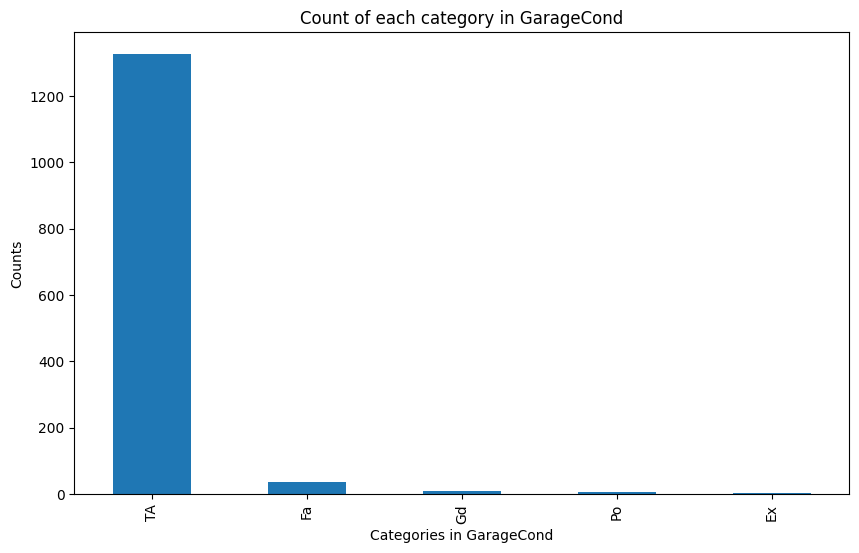

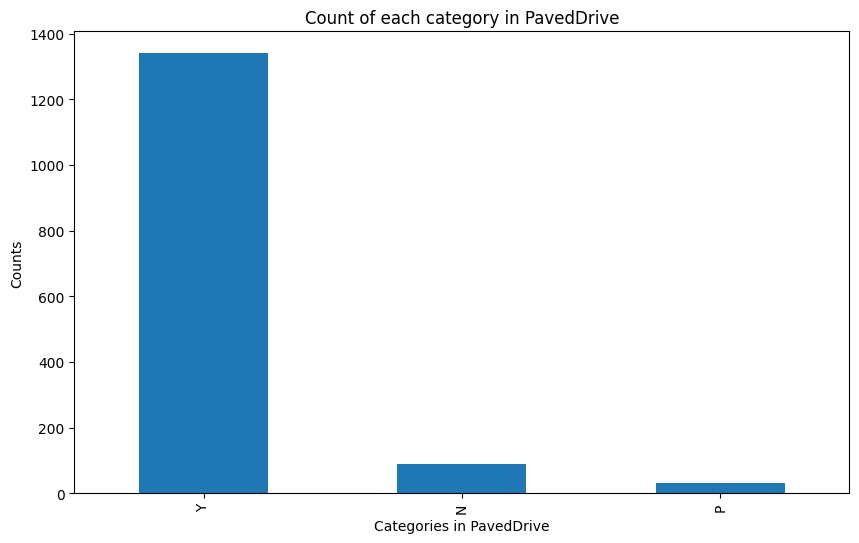

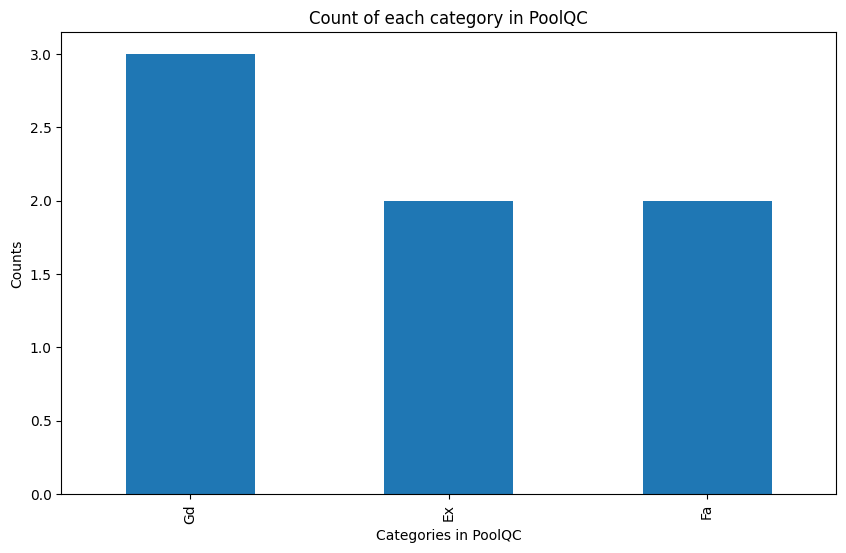

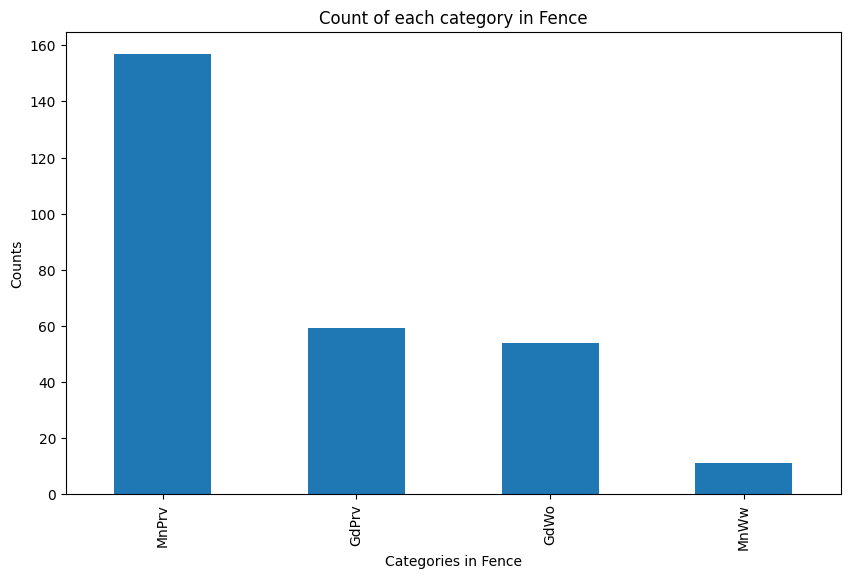

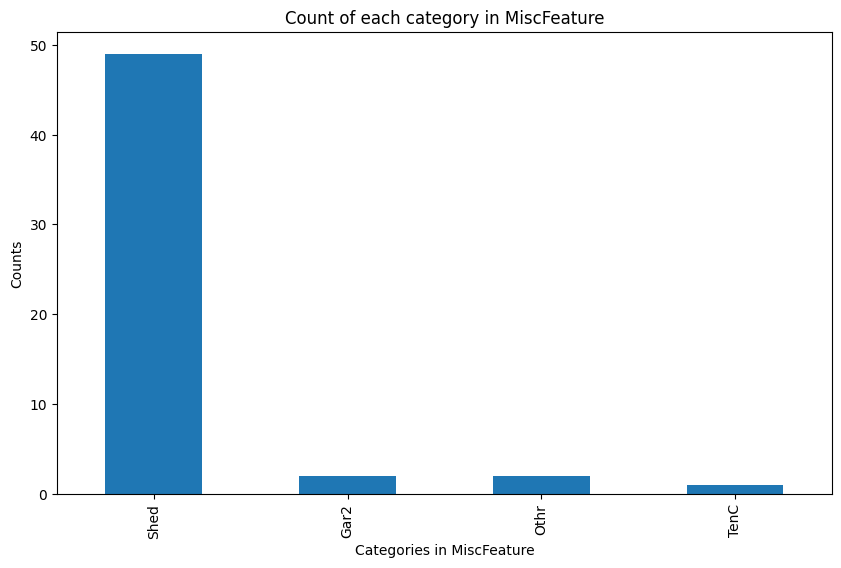

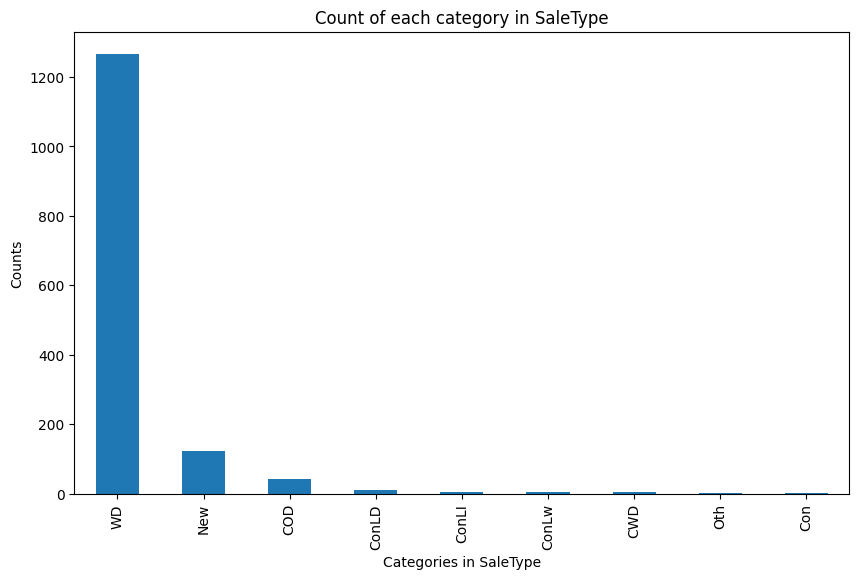

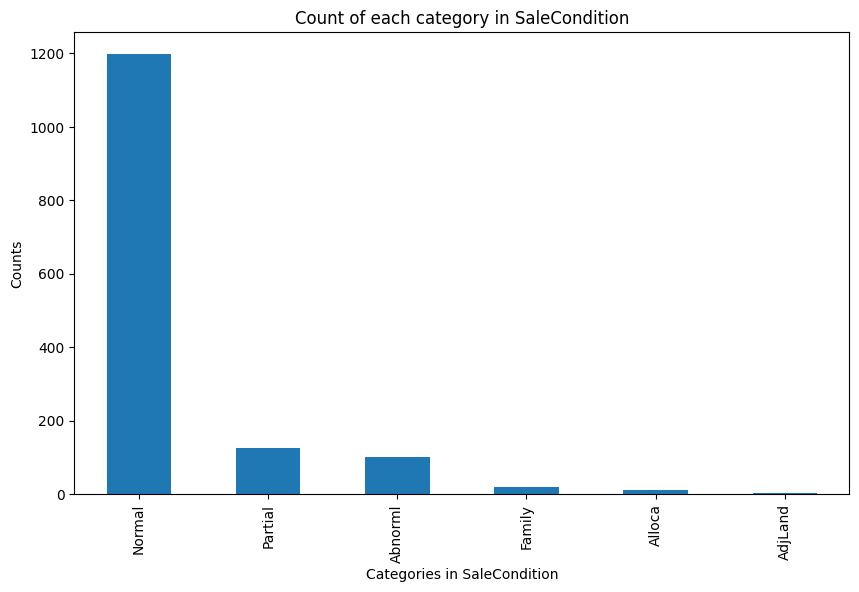

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col].value_counts().plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel(f'Categories in {col}')
    plt.ylabel('Counts')
    plt.title(f'Count of each category in {col}')
    plt.show()

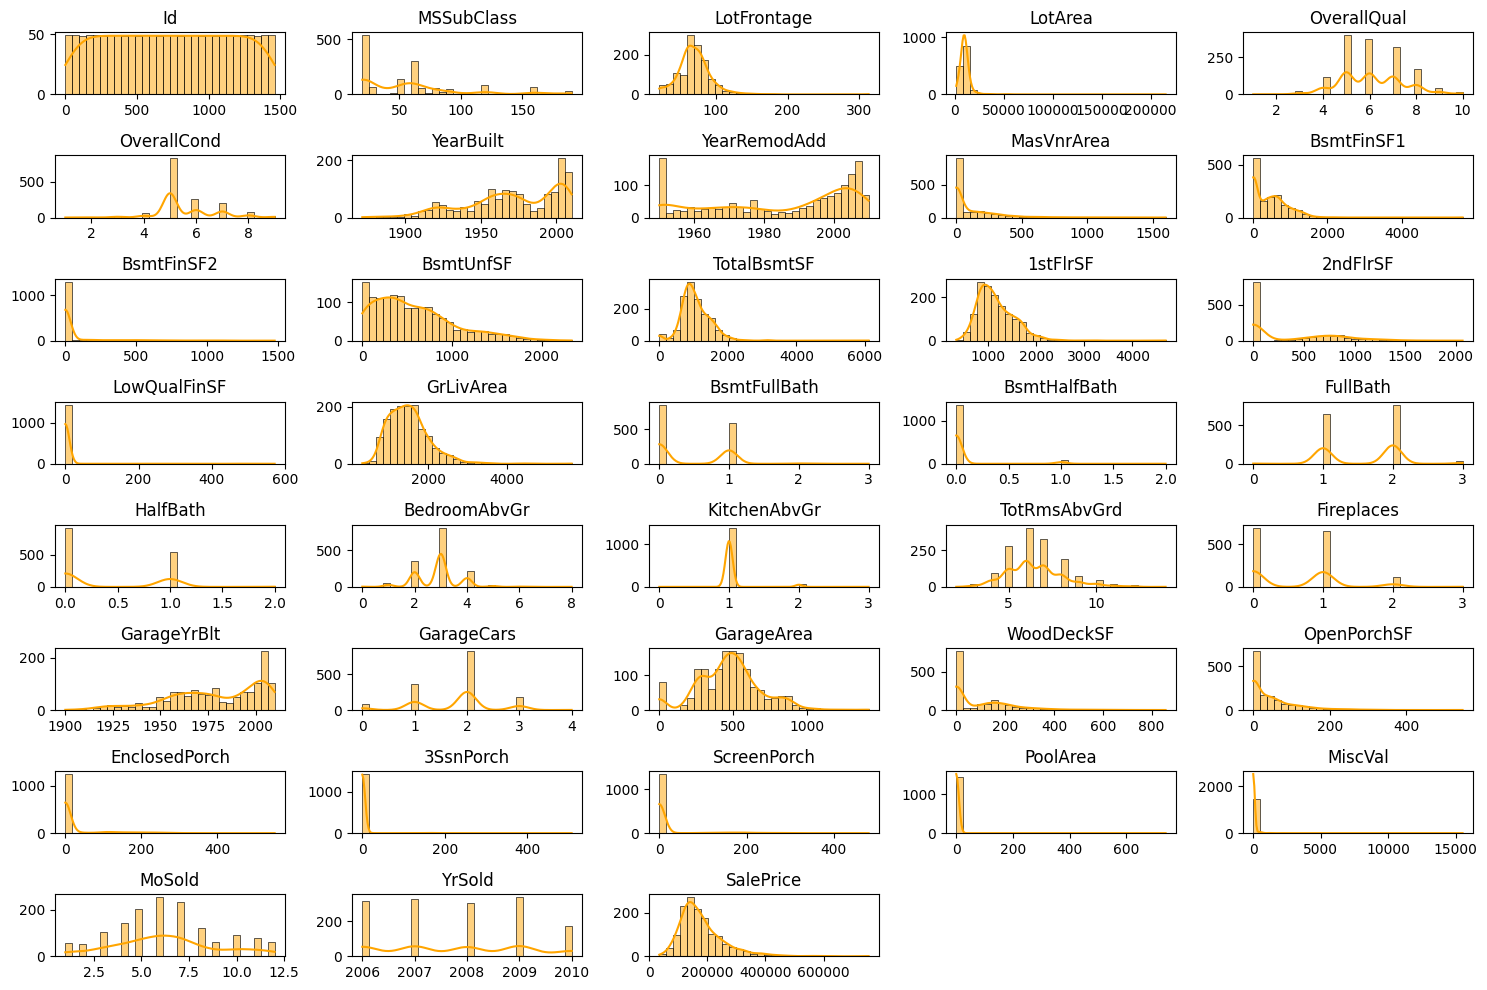

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(8, 5, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='orange')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


<ipython-input-12-dd284ccffe99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Electrical', palette='plasma')


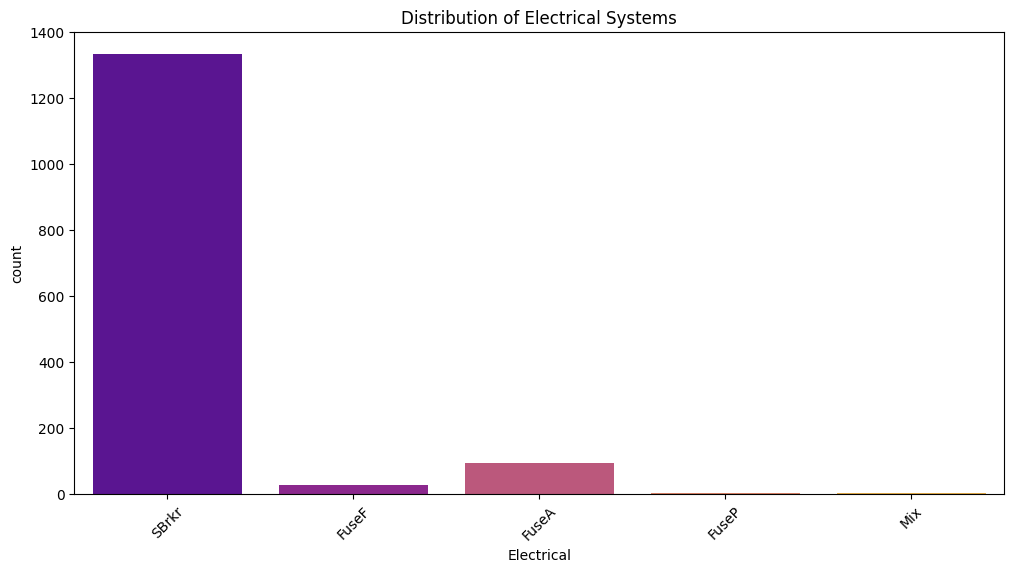

In [ ]:
# Plot Electrical System
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Electrical', palette='plasma')
plt.title('Distribution of Electrical Systems')
plt.xticks(rotation=45)
plt.show()

This countplot shows the most common electrical system among houses.

<ipython-input-13-dd689c97230e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='coolwarm')


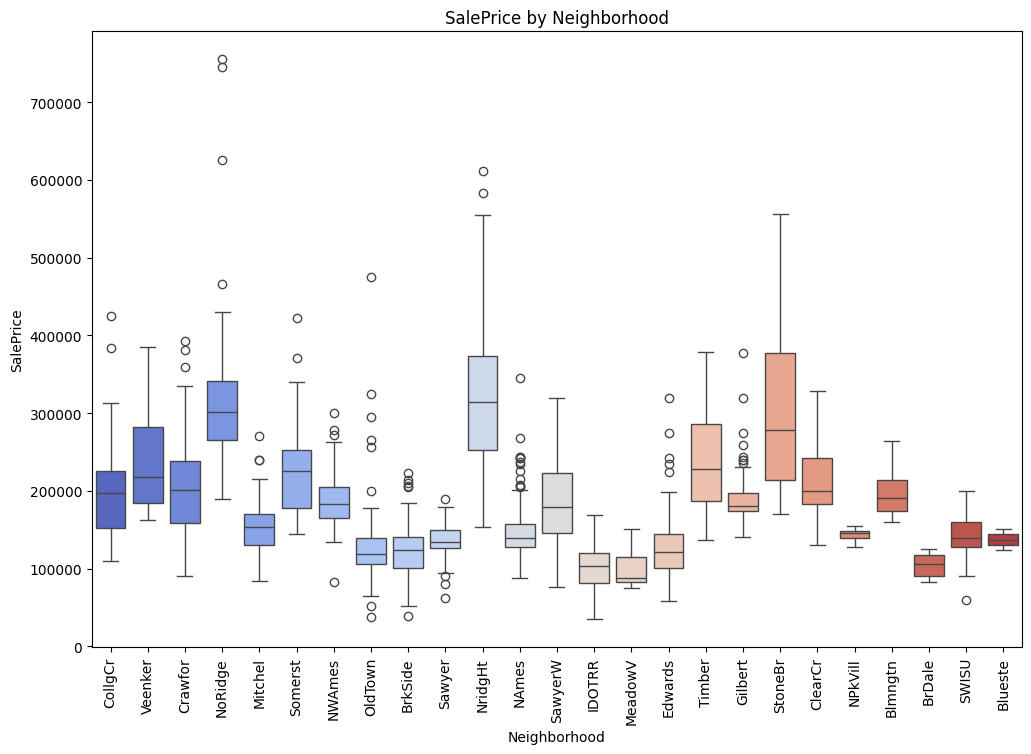

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()


- This visualization allows us to see the distribution of sale prices across different neighborhoods. Some neighborhoods may have significantly higher median sale prices, indicating that location is a key factor in house pricing.
- Outliers in certain neighborhoods might also indicate areas where house prices deviate significantly from the normal.

<ipython-input-14-c883a146f2b8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OverallQual', y='SalePrice', data=df, palette ='coolwarm', ci =None)
<ipython-input-14-c883a146f2b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallQual', y='SalePrice', data=df, palette ='coolwarm', ci =None)


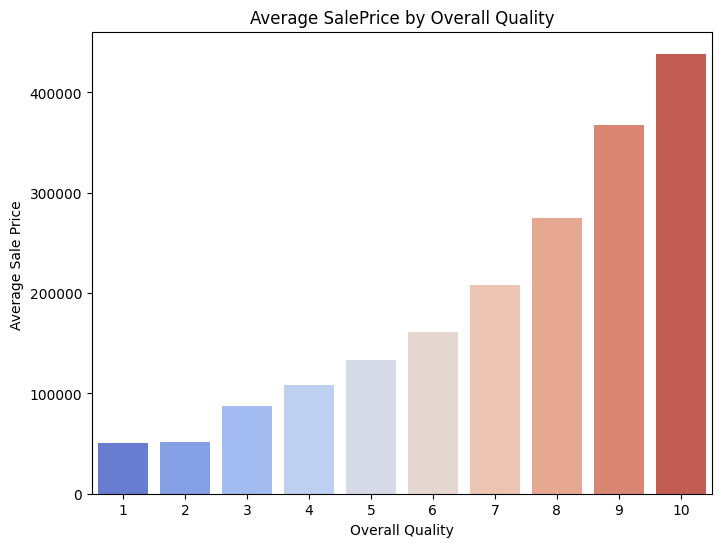

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('Average SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price ')
plt.show()


This visualizeation shows the distribution of sale prices for different overall quality ratings. It allows for a deeper look into how the quality rating impacts sale price

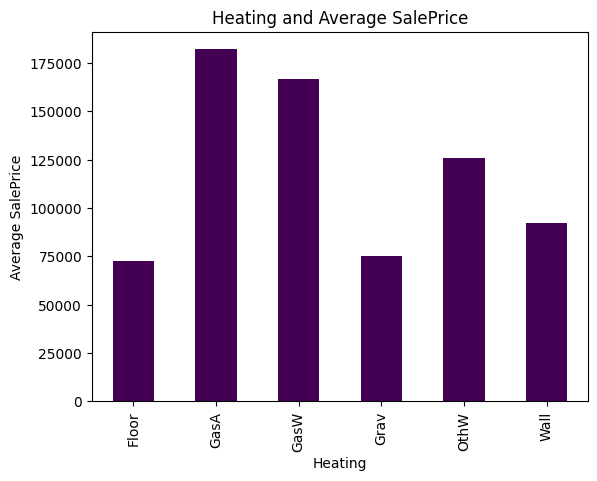

In [6]:
# Stacked Bar Chart of Garage Type and SalePrice
garage_saleprice = df.groupby('Heating')['SalePrice'].mean()
garage_saleprice.plot(kind='bar', colormap='viridis')
plt.title('Heating and Average SalePrice')
plt.ylabel('Average SalePrice')
plt.show()

This visualization show the impact of the Heating on the price.

Types: GasA and GasW are the highest SalePrice.

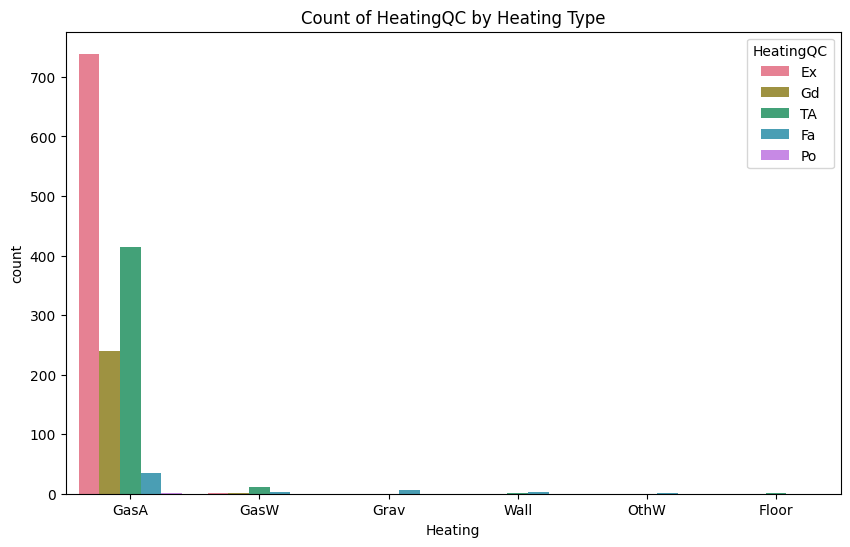

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Heating', hue='HeatingQC', data=df, palette ='husl')
plt.title('Count of HeatingQC by Heating Type')
plt.show()


This visualization helps in understanding the relationship between the type of heating system used and its perceived quality.

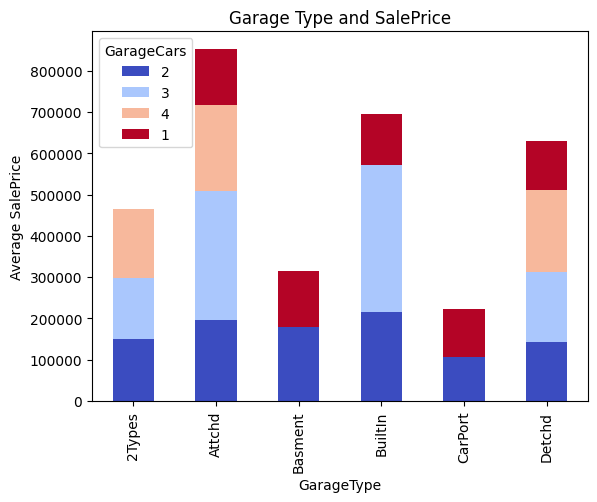

In [ ]:
# Stacked Bar Chart of Garage Type and SalePrice
garage_saleprice = df.groupby(['GarageType', 'GarageCars'])['SalePrice'].mean().unstack()
garage_saleprice.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Garage Type and SalePrice')
plt.ylabel('Average SalePrice')
plt.show()

This shows how the type and size of the garage affect the sale price. As we see, homes with attached garages might consistently have higher prices, and the more cars a garage can accommodate, the higher the likely sale price.

<ipython-input-18-a34d980380c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GarageCars', y='SalePrice', data=df, ci=None, palette ='husl')
<ipython-input-18-a34d980380c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GarageCars', y='SalePrice', data=df, ci=None, palette ='husl')


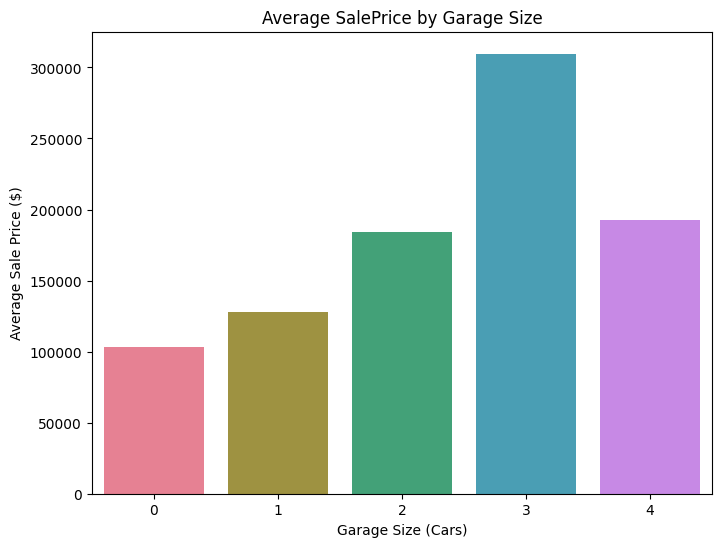

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='GarageCars', y='SalePrice', data=df, ci=None, palette ='husl')
plt.title('Average SalePrice by Garage Size')
plt.xlabel('Garage Size (Cars)')
plt.ylabel('Average Sale Price ($)')
plt.show()


This bar plot highlights how garage size affects the house price, showing that homes with larger garages generally have higher sale prices.

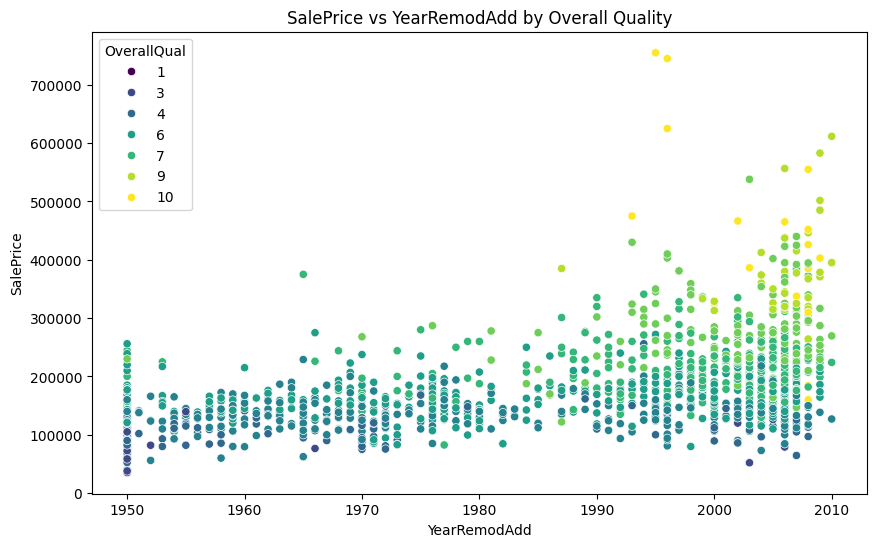

In [ ]:
# Scatter Plot of SalePrice vs. YearRemodAdd with Color by OverallQual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', hue='OverallQual', palette='viridis', data=df)
plt.title('SalePrice vs YearRemodAdd by Overall Quality')
plt.show()

This can reveal how recent renovations correlate with sale price and how overall quality influences this relationship. Houses that were remodeled more recently and have high overall quality often command higher prices.

<ipython-input-20-644608a59a36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SaleCondition', y='SalePrice', data=df, palette ='coolwarm')


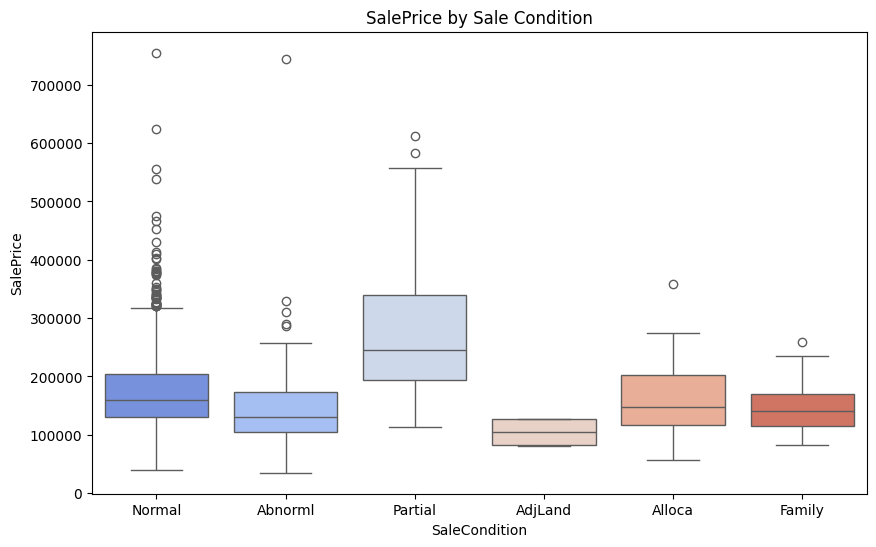

In [ ]:
# Boxplot of SalePrice by SaleCondition
plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df, palette ='coolwarm')
plt.title('SalePrice by Sale Condition')
plt.show()


This boxplot shows how different sale conditions impact the final sale price.

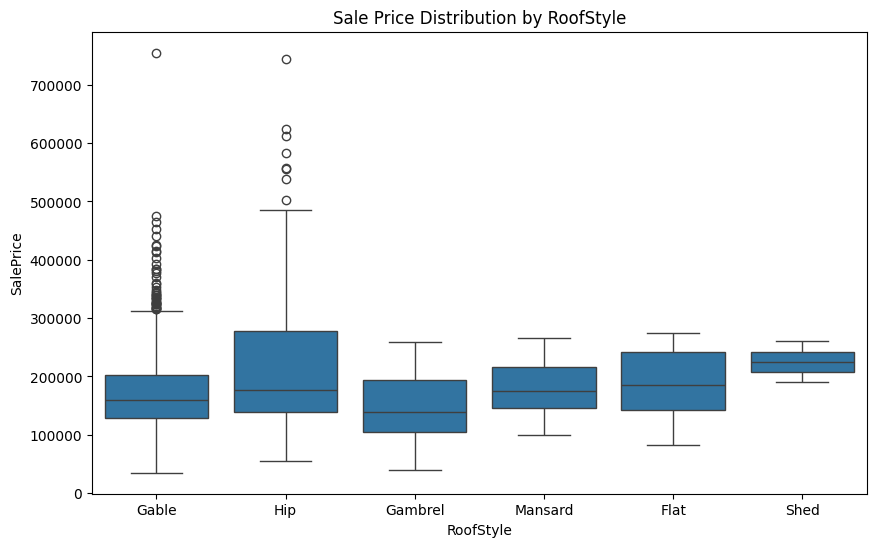

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)
plt.title('Sale Price Distribution by RoofStyle')
plt.show()


This visualization can give an overall sense of the popularity of different roof styles in the housing market.

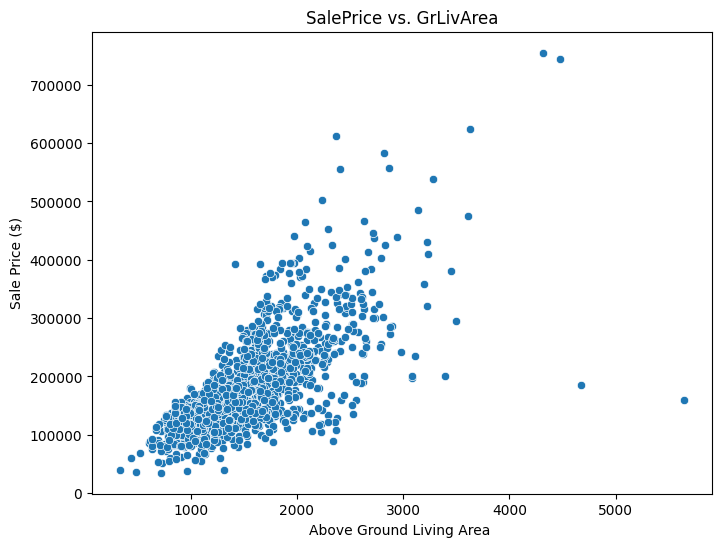

In [ ]:
# Displaying the relationship between sale price and Ground living area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('Above Ground Living Area ')
plt.ylabel('Sale Price ($)')
plt.show()


This scatter plot shows the realtionship between the living area and sale prices . it can give us insights into how the living area impacts the sale price. with a strong positive correlation indicating that it is a key factor of sale price.

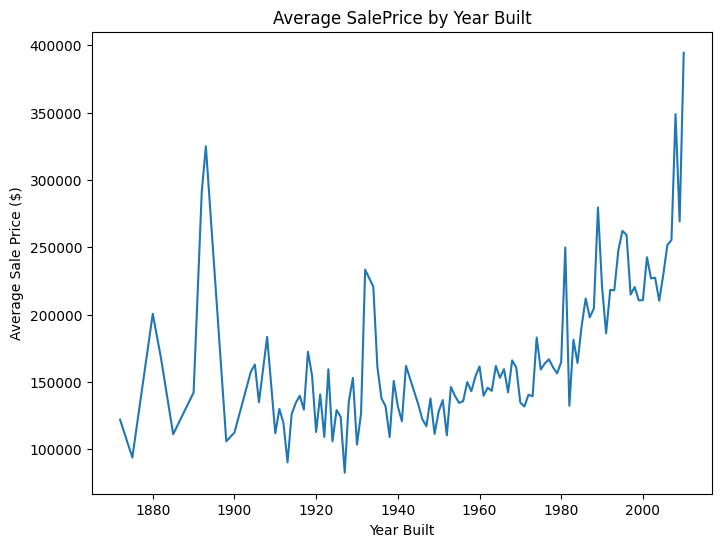

In [ ]:
df.groupby('YearBuilt')['SalePrice'].mean().plot(kind='line', figsize=(8, 6))
plt.title('Average SalePrice by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price ($)')
plt.show()


This line plot shows trends in house prices over time, revealing whether newer homes are typically more expensive.

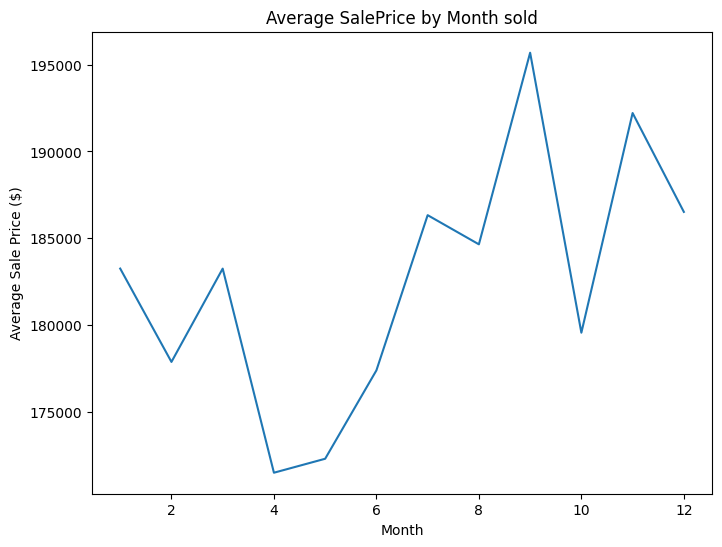

In [ ]:
df.groupby('MoSold')['SalePrice'].mean().plot(kind='line', figsize=(8, 6))
plt.title('Average SalePrice by Month sold')
plt.xlabel('Month')
plt.ylabel('Average Sale Price ($)')
plt.show()


This plot represents the month when houses were sold. and shows how the average sale price of houses changes from month to month.

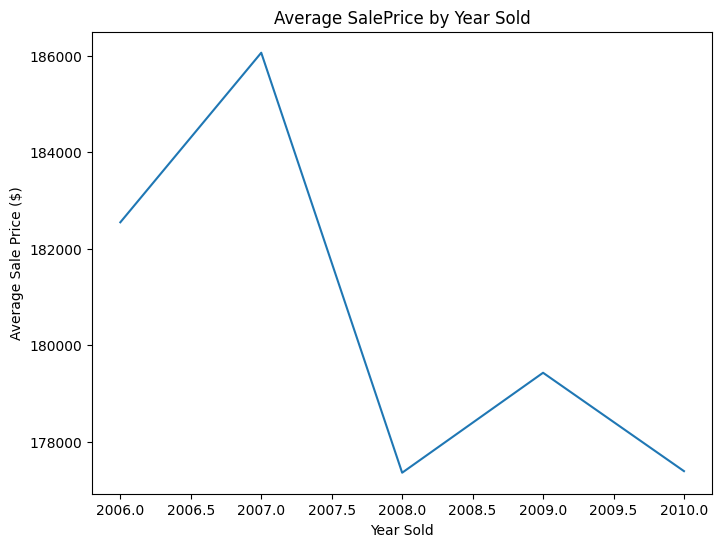

In [ ]:
df.groupby('YrSold')['SalePrice'].mean().plot(kind='line', figsize=(8, 6))
plt.title('Average SalePrice by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price ($)')
plt.show()


Like the previous plot, this represents the year when houses were sold.

<ipython-input-26-6594532ac77b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='HouseStyle', data=df, order=df['HouseStyle'].value_counts().index, palette ='husl')


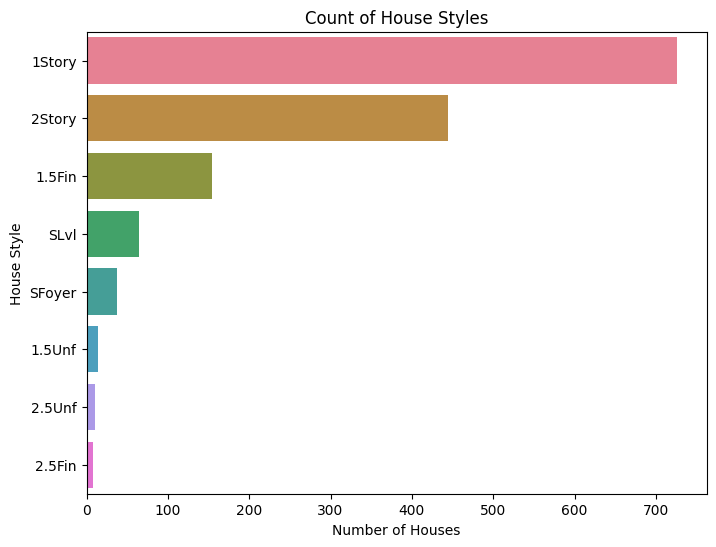

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y='HouseStyle', data=df, order=df['HouseStyle'].value_counts().index, palette ='husl')
plt.title('Count of House Styles')
plt.xlabel('Number of Houses')
plt.ylabel('House Style')
plt.show()


This provides a quick overview of the most common house styles in the dataset, which can be important for understanding trends.

<ipython-input-27-ad0e793ae0ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MasVnrType', y='SalePrice', data=df, palette ='husl')


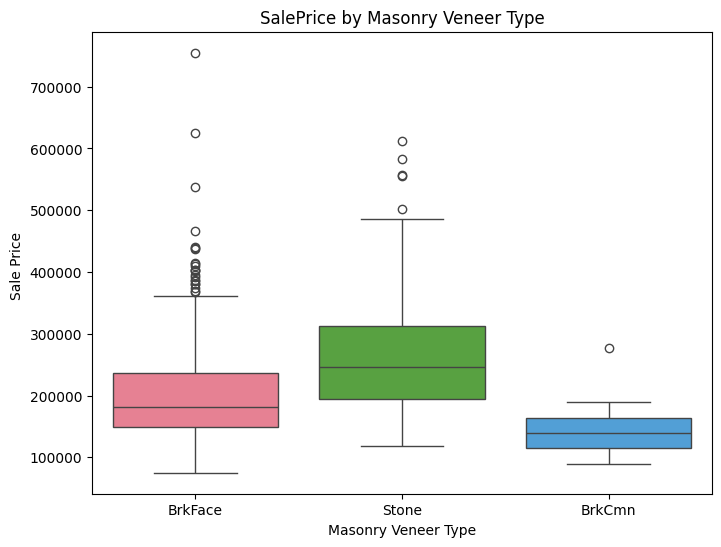

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=df, palette ='husl')
plt.title('SalePrice by Masonry Veneer Type')
plt.xlabel('Masonry Veneer Type')
plt.ylabel('Sale Price ')
plt.show()


This visualization can help us see if different types of masonry veneer are associated with varying sale prices.


<ipython-input-28-e25a481ef0ec>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CentralAir', y='SalePrice', data=df, palette ='coolwarm', ci =None)
<ipython-input-28-e25a481ef0ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CentralAir', y='SalePrice', data=df, palette ='coolwarm', ci =None)


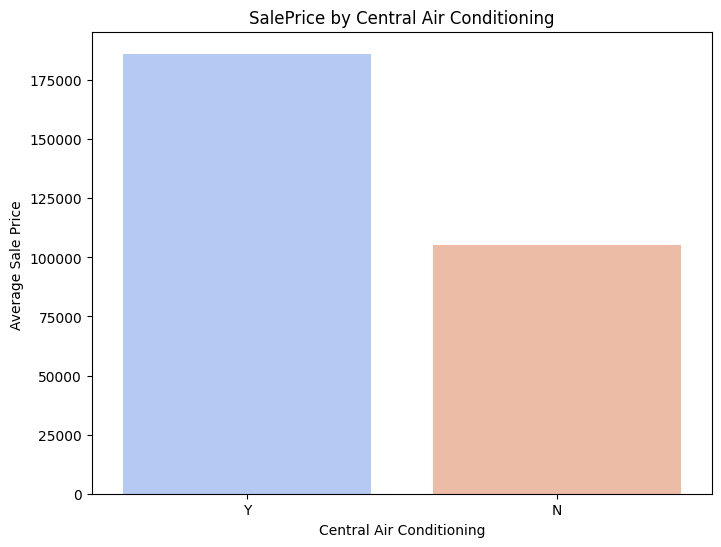

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CentralAir', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('SalePrice by Central Air Conditioning')
plt.xlabel('Central Air Conditioning')
plt.ylabel('Average Sale Price ')
plt.show()


This plot helps assess whether central air conditioning significantly impacts sale prices.

<ipython-input-29-74c842e4bdfd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PavedDrive', y='SalePrice', data=df, palette='husl')


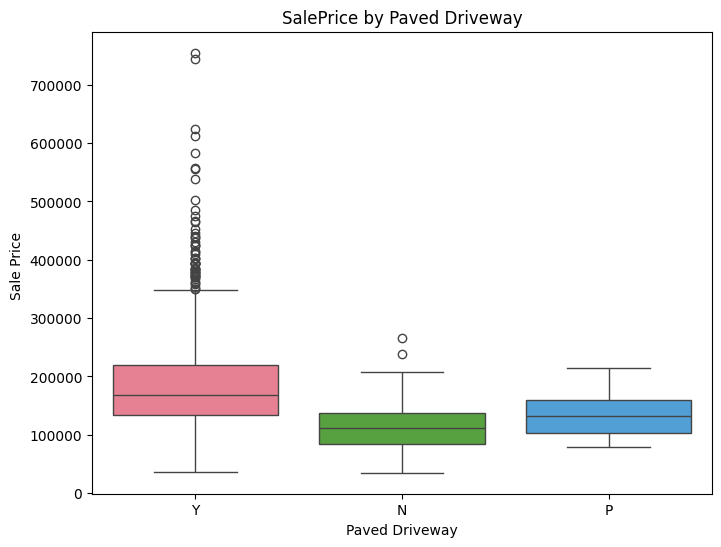

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PavedDrive', y='SalePrice', data=df, palette='husl')
plt.title('SalePrice by Paved Driveway')
plt.xlabel('Paved Driveway')
plt.ylabel('Sale Price ')
plt.show()


This visualization can reveal whether having a paved driveway is associated with higher sale prices.

<ipython-input-30-b9b7aa6179d6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fireplaces', y='SalePrice', data=df, palette ='husl', ci =None)
<ipython-input-30-b9b7aa6179d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fireplaces', y='SalePrice', data=df, palette ='husl', ci =None)


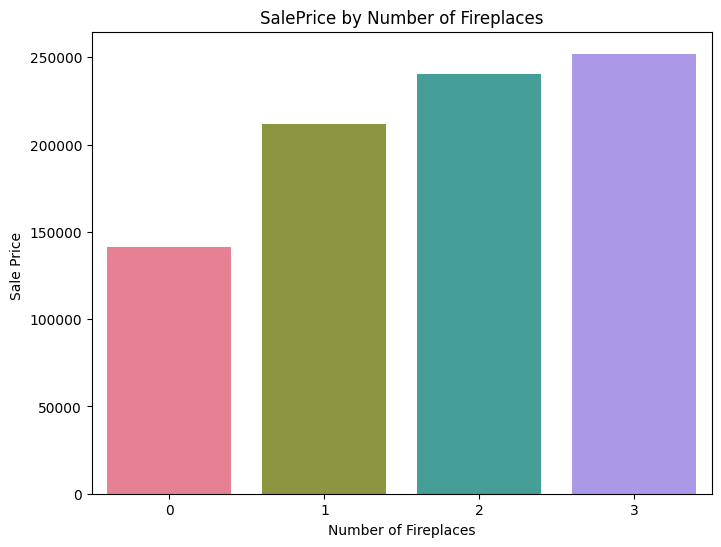

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Fireplaces', y='SalePrice', data=df, palette ='husl', ci =None)
plt.title('SalePrice by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price ')
plt.show()


This plot helps us understand if more fireplaces correspond to higher sale prices.


<ipython-input-31-83216ef74119>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LotShape', y='SalePrice', data=df, palette ='coolwarm')


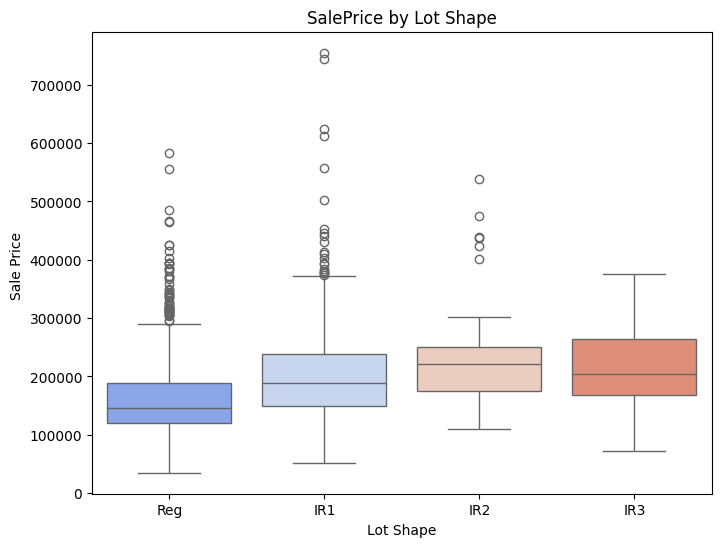

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=df, palette ='coolwarm')
plt.title('SalePrice by Lot Shape')
plt.xlabel('Lot Shape')
plt.ylabel('Sale Price ')
plt.show()


This plot can indicate whether irregularly shaped lots have a different impact on sale price compared to regular ones.

<ipython-input-32-b620f2feae38>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Condition1', y='SalePrice', data=df, palette ='husl', ci =None)
<ipython-input-32-b620f2feae38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Condition1', y='SalePrice', data=df, palette ='husl', ci =None)


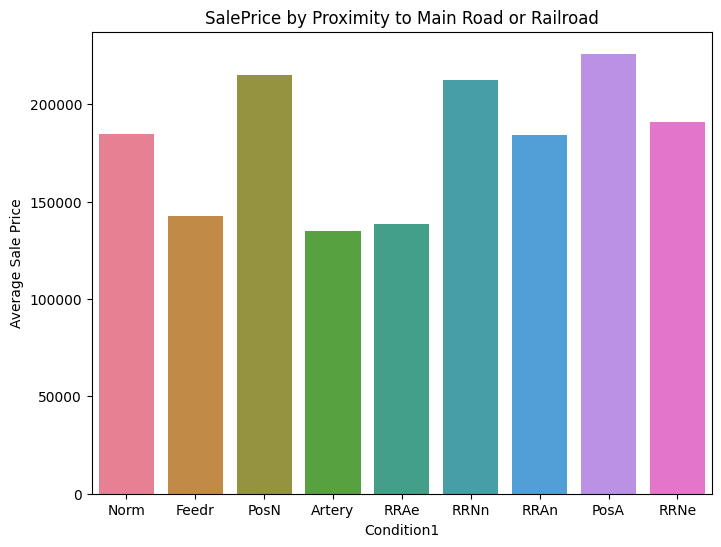

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition1', y='SalePrice', data=df, palette ='husl', ci =None)
plt.title('SalePrice by Proximity to Main Road or Railroad')
plt.xlabel('Condition1')
plt.ylabel('Average Sale Price')
plt.show()


This helps to see if proximity to a road or railroad affects the house price.

<ipython-input-33-202f918bc296>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fence', y='SalePrice', data=df, palette ='coolwarm', ci =None)
<ipython-input-33-202f918bc296>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fence', y='SalePrice', data=df, palette ='coolwarm', ci =None)


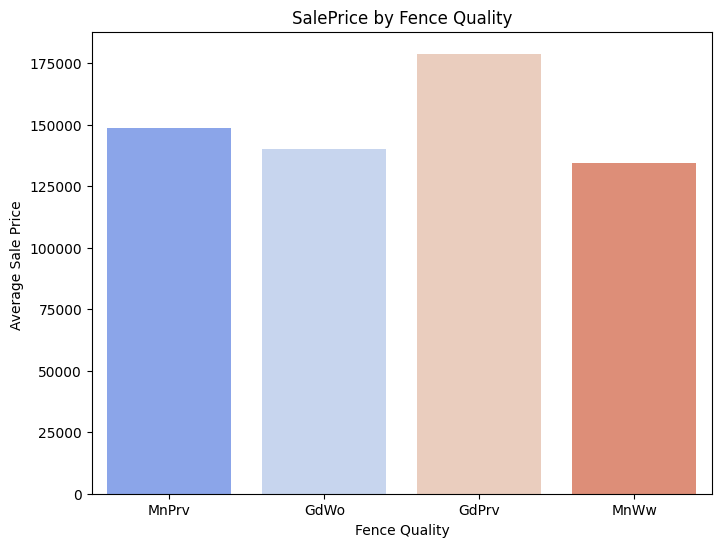

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Fence', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('SalePrice by Fence Quality')
plt.xlabel('Fence Quality')
plt.ylabel('Average Sale Price ')
plt.show()


This visualization can reveal whether a higher quality fence is associated with higher sale prices.

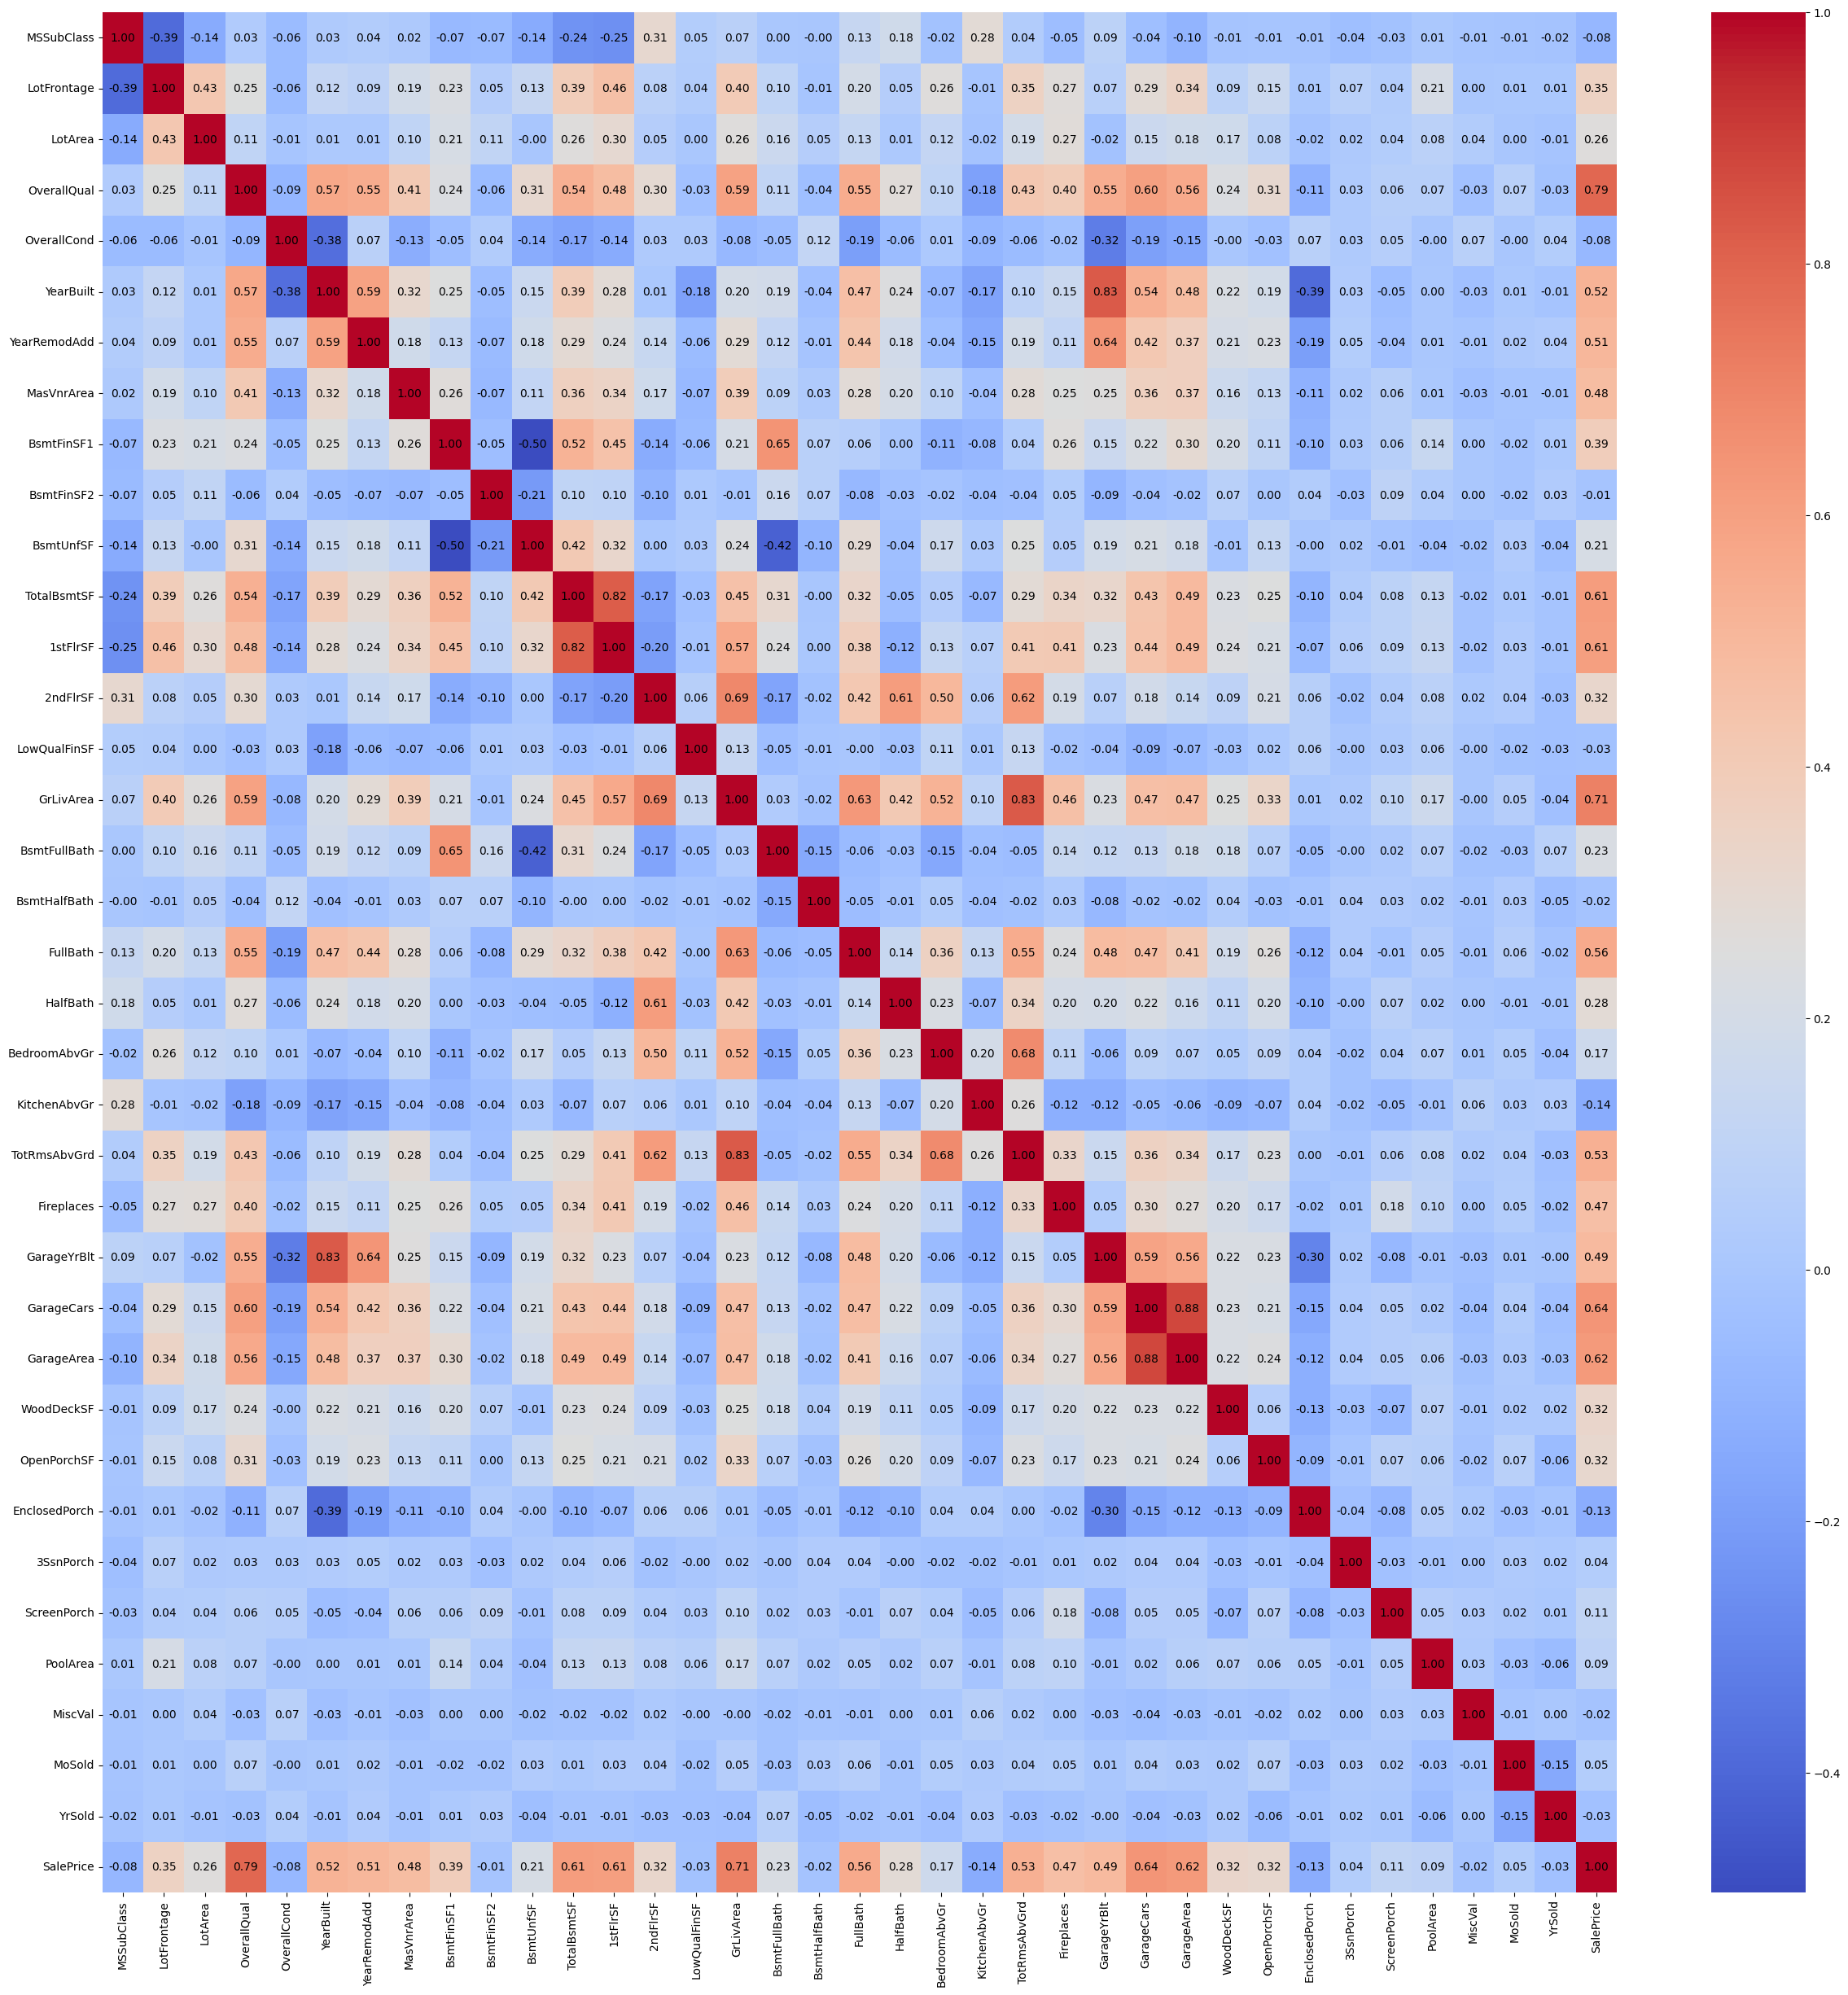

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)

# Annotate the heatmap with correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Show the plot
plt.show()

The heat map shows there multicolinearity, many columns with high correlation with others like==> (yearBuilt, GarageYrBlt), (TotRmsAbvGrd, GrlivArea), (GrlivArea, 2ndFlrSF)

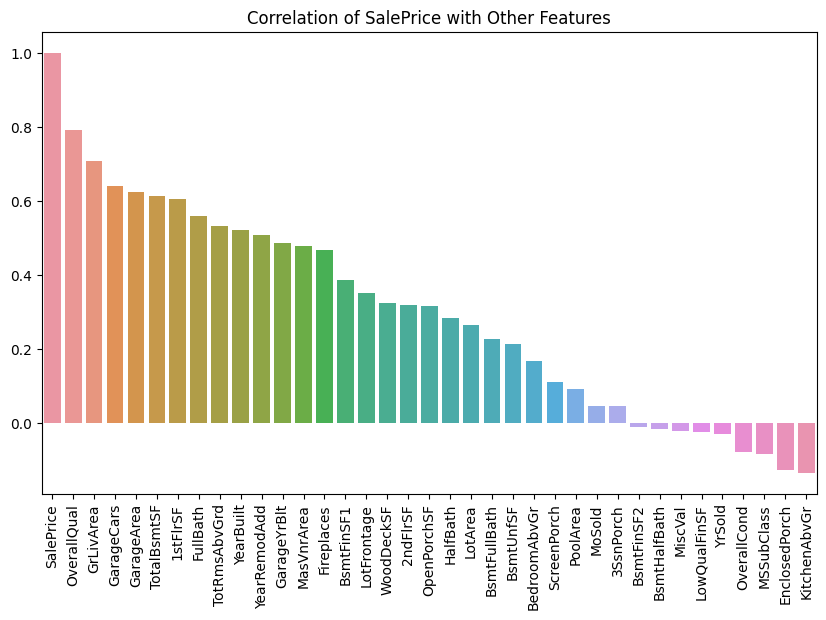

In [ ]:
# Displaying the relationship between the target variable and other features
plt.figure(figsize=(10, 6))
saleprice_corr = corr['SalePrice'].sort_values(ascending=False)
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of SalePrice with Other Features')
plt.show()

In [4]:
# Selecting only numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

print("Numerical features:", numerical_features)


Numerical features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


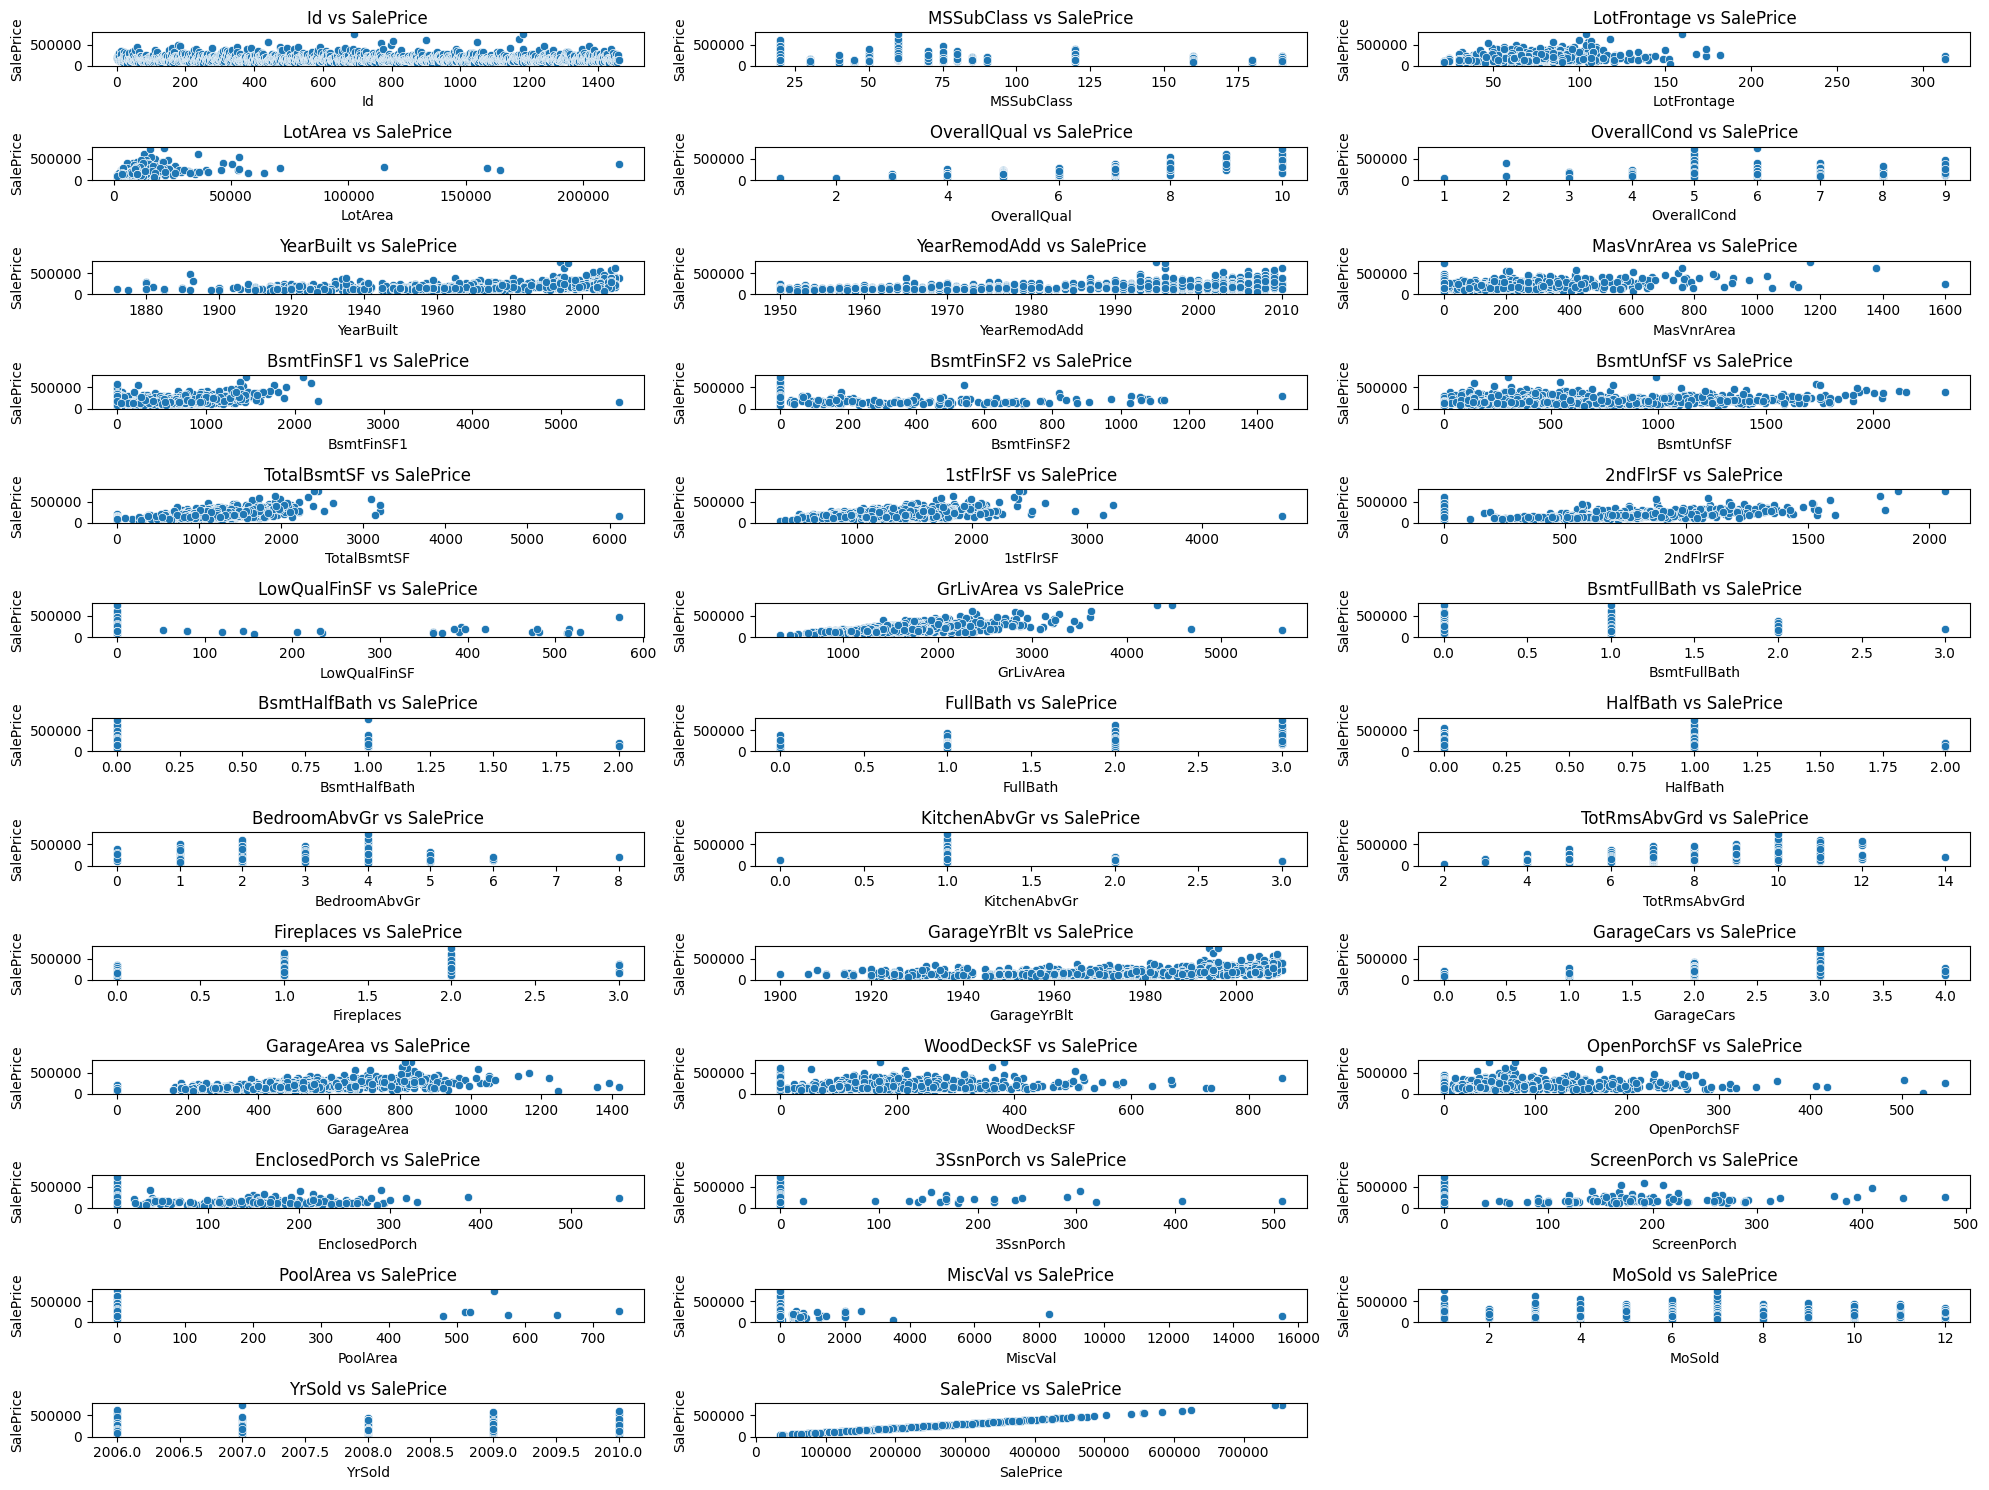

In [5]:

target_variable = 'SalePrice'

# Plot scatter plots for all numerical features against the target variable (to check for linearity and nonlinearity)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.scatterplot(data=df, x=feature, y=target_variable)
    plt.title(f'{feature} vs {target_variable}')

plt.tight_layout()
plt.show()


<ipython-input-36-a3d90613af86>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='husl')


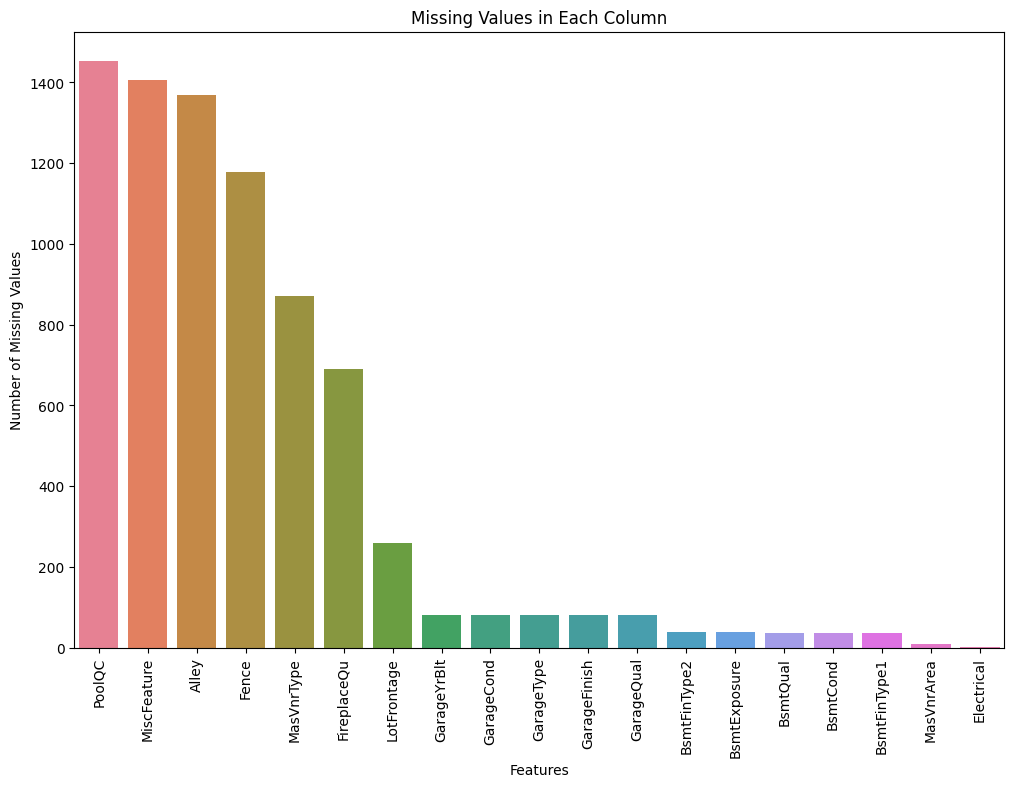

In [ ]:
# Checking for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='husl')
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()


# Data Cleaning

In [ ]:
df.isna().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [ ]:
percentages = [(col, percentage) for col, percentage in (df.isnull().sum() / df.shape[0]).items() if percentage > 0.4]

In [ ]:
percentages

[('Alley', 0.9376712328767123),
 ('MasVnrType', 0.5972602739726027),
 ('FireplaceQu', 0.4726027397260274),
 ('PoolQC', 0.9952054794520548),
 ('Fence', 0.8075342465753425),
 ('MiscFeature', 0.963013698630137)]

In [ ]:
for col, _ in percentages:
    df.drop(col, axis=1, inplace=True)

In [ ]:
df.isna().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC   

In [ ]:
df=df.dropna(thresh= int(0.60*len(df.columns)))

In [ ]:
df.shape

(1460, 75)

# Feature Engineering

In [ ]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
nulCol=df.isnull().sum()
nulCol=nulCol[nulCol>0]
nulCol=nulCol.index.tolist()

In [ ]:
print(nulCol)

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [ ]:
nul_numeric_col = [col for col in nulCol if df[col].dtype != 'object']
nul_categorical_col = [col for col in nulCol if df[col].dtype == 'object']

In [ ]:
nul_numeric_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
nul_categorical_col

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

categorical_df = df.select_dtypes(include=['object', 'category'])

In [ ]:
nul_numeric_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
numeric_df_cleaned = df.select_dtypes(include=['number'])

categorical_df_cleaned = df.select_dtypes(include=['object', 'category'])

In [ ]:
def corr_methods(df,method=''):
    if method == '':
        corr_matrix= df.corr()
    elif method == 'spearman':
        corr_matrix= df.corr(method='spearman')
    elif method == 'kendall':
        corr_matrix= df.corr(method='kendall')

    # Mask the upper triangle to avoid duplicate pairs
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    upper = corr_matrix.where(mask)

    # Find the index of the maximum correlation value
    max_corr = upper.abs().unstack().sort_values(ascending=False)
    max_corr = max_corr[max_corr < 1]
    max_corr = max_corr[max_corr>0.8]

    return max_corr



#### corr before filling the missing values

In [ ]:
# linear correlation
corr_methods(numeric_df)

GarageArea    GarageCars     0.882475
GarageYrBlt   YearBuilt      0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
dtype: float64

In [ ]:
# non linear correlation
corr_methods(numeric_df,'spearman')

GarageYrBlt   YearBuilt      0.890546
GarageArea    GarageCars     0.853317
1stFlrSF      TotalBsmtSF    0.829292
TotRmsAbvGrd  GrLivArea      0.827874
SalePrice     OverallQual    0.809829
dtype: float64

In [ ]:
corr_methods(numeric_df,'kendall')

GarageYrBlt  YearBuilt    0.838521
dtype: float64

In [ ]:
copy=df.copy()

In [ ]:
df=copy

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   
1           0        284         1262    GasA        Ex          Y      SBrkr   
2           0        434          920    GasA        Ex          Y      SBrkr   
3           0        540          756    GasA        Gd          Y      SBrkr   
4           0        490         1145    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       2003.0          RFn           2   
1        Typ           1     Attchd       1976.0          RFn      

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

#### drop Features with High correlation

In [ ]:
# GarageArea    GarageCars     0.882475

########## Wrong approch
# df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']

# # Handling "div over zero values"
# df['GarageAreaPerCar'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# df.drop(columns=['GarageArea', 'GarageCars'], inplace=True)

df.drop(columns=['GarageCars'], inplace=True)


In [ ]:
# GarageYrBlt   YearBuilt      0.890546

df.drop(columns=['GarageYrBlt'], inplace=True)

In [ ]:
df.drop(columns=['1stFlrSF','2ndFlrSF'], inplace=True)

### tracking related values have not been catched in corr
#### due to categorical and numerecal cols


In [ ]:
def colWithWord(columns,word):
    return [col for col in columns if word in col.lower()]

In [ ]:
colWithWord(df.columns,'qual')

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'LowQualFinSF',
 'KitchenQual',
 'GarageQual']

##### track the cols that have Qual features

In [ ]:
colWithWord(df.columns,'exter')   # handeled down

['Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']

In [ ]:
colWithWord(df.columns,'bsmt')  # hancdeld down

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [ ]:
colWithWord(df.columns,'kitchen') # handeld  down

['KitchenAbvGr', 'KitchenQual']

In [ ]:
colWithWord(df.columns,'garage') # handeld  down

['GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond']

In [ ]:
# continue Tracking

In [ ]:
df.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

### Exterior

#### ['Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond'] what's matter is quality and conditino

In [ ]:
extercond_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}

df['ExterCond'] = df['ExterCond'].map(extercond_mapping)

df['ExterQual'] = df['ExterQual'].map(extercond_mapping)

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond  \
0  CompShg     VinylSd     VinylSd       196.0          4          3   
1  CompShg     MetalSd     MetalSd         0.0          3          3   
2  CompShg     VinylSd     VinylSd       162.0          4          3   
3  CompShg     Wd Sdng     Wd Shng         0.0          3          3   
4  CompShg     VinylSd     VinylSd       350.0          4          3   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          Y      SBrkr             0       1710             1             0   
1          Y      SBrkr             0       1262             0             1   
2          Y      SBrkr             0       1786             1             0   
3          Y      SBrkr             0       1717             1             0   
4          Y      SBrkr             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces GarageType GarageFinish  GarageArea GarageQual  \
0        Typ           0     Attchd          RFn         548         TA   
1        Typ           1     Attchd          RFn         460         TA   
2        Typ           1     Attchd          RFn         608         TA   
3        Typ           1     

In [ ]:
df['ExterOverAll'] = df['ExterCond'] + df['ExterQual']

df.drop(columns=['ExterCond', 'ExterQual'], inplace=True)

df.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)


#### handling Bsmnt Col


In [ ]:
bsmtfin_mapping = {
    'GLQ': 5,  # Good Living Quarters
    'ALQ': 4,  # Average Living Quarters
    'BLQ': 3,  # Below Average Living Quarters
    'Rec': 2,  # Recreation Room
    'LwQ': 1,  # Low Quality
    'Unf': 0   # Unfinished
}

bsmt_exposure_mapping = {
    'Gd': 3,  # Good Exposure
    'Av': 2,  # Average Exposure
    'Mn': 1,  # Minimal Exposure
    'No': 0   # No Exposure
}




df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtfin_mapping)

df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtfin_mapping)

df['BsmtQual'] = df['BsmtQual'].map(extercond_mapping) # same mapping like exterior

df['BsmtCond'] = df['BsmtCond'].map(extercond_mapping) # same mapping like exterior

df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_mapping)



In [ ]:
# BsmtOverAllQual = (BsmtQual +  BsmtCond + BsmtExposure )
# BsmtTypeFinSFOverAll  = (BsmtFinType1 * BsmtFinSF1 + BsmtFinType2 * BsmtFinSF2 ) - avg(BsmtFinType2,BsmtFinType1)* BsmtUnfSF - 0.4*avg(BsmtFinType2,BsmtFinType1)*LowQualFinSF

In [ ]:
df['BsmtOverAllQual'] = df['BsmtQual'] + df['BsmtCond'] + df['BsmtExposure'] # do not need to normalize them before combine them cz the values from 0-3 & 0-5

df['AvgFinType'] = (df['BsmtFinType1'] + df['BsmtFinType2']) / 2

# Calculate BsmtTypeFinSFOverAll using the provided formula
df['BsmtTypeFinSFOverAll'] = (
    (df['BsmtFinType1'] * df['BsmtFinSF1']) +
    (df['BsmtFinType2'] * df['BsmtFinSF2']) -
    (df['AvgFinType'] * df['BsmtUnfSF']) -
    (0.4*df['AvgFinType'] * df['LowQualFinSF'])
)

df.drop(columns=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'AvgFinType','LowQualFinSF'], inplace=True)

In [ ]:
df['BsmtTypeFinSFOverAll'].isnull().sum()

38

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl  MasVnrArea Foundation  TotalBsmtSF Heating HeatingQC CentralAir  \
0  CompShg       196.0      PConc          856    GasA        Ex          Y   
1  CompShg         0.0     CBlock         1262    GasA        Ex          Y   
2  CompShg       162.0      PConc          920    GasA        Ex          Y   
3  CompShg         0.0     BrkTil          756    GasA        Gd          Y   
4  CompShg       350.0      PConc         1145    GasA        Ex          Y   

  Electrical  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0      SBrkr       1710             1             0         2         1   
1      SBrkr       1262             0             1         2         0   
2      SBrkr       1786             1             0         2         1   
3      SBrkr       1717             1             0         1         0   
4      SBrkr       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageArea GarageQual GarageCond  \
0           0     Attchd          RFn         548         TA         TA   
1           1     Attchd          RFn         460         TA         TA   
2           1     Attchd          RFn         608         TA         TA   
3           1     Detchd          Unf         642         TA         TA   
4           1     Attchd          RFn         836         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3          Y           0           35            272          0            0   
4          Y         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  \
0         0        0       2    2008       WD        Normal     208500   
1         0        0       5    2007       WD        Normal     181500   
2         0        0       9    2008       WD        Normal     223500   
3        

### Bsmt Bathrooms


In [ ]:
# BsmtBathrooms=(BsmtFullBath*1.5 + BsmtHalfBath)

In [ ]:
df['BsmtBathrooms'] = (df['BsmtFullBath'] * 1.5) + df['BsmtHalfBath']

df.drop(columns=['BsmtHalfBath', 'BsmtFullBath'], inplace=True)

### Baths
the diff ??

In [ ]:
df['Bathrooms'] = (df['FullBath'] * 1.5) + df['HalfBath']

df.drop(columns=['FullBath', 'HalfBath'], inplace=True)

### Kitchens
['KitchenAbvGr', 'KitchenQual']

In [ ]:
df['KitchenQual'] = df['KitchenQual'].map(extercond_mapping)

In [ ]:
# KitchenOverAll = KitchenAbvGr * KitchenQual

In [ ]:
df['KitchenOverAll'] = df['KitchenAbvGr'] * df['KitchenQual']

df.drop(columns=['KitchenAbvGr', 'KitchenQual'], inplace=True)

### Garage

In [ ]:
# GarageType
# steps :
# do target encoding
# sort Descending
# rank the values accordingly
# map the values

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageAreaPerCar']

In [ ]:
# GarageQualOverAll=  ( GarageQual + GarageCond + GarageFinish ) * GarageArea
# GarageType     will be the same -> can't think in condition

In [ ]:
garage_type_preference_mapping = {
    'Attchd': 1,   # Attached
    'BuiltIn': 2,  # Built-In
    'Detchd': 3,   # Detached
    '2Types': 4,   # 2 Types
    'Basment': 5,   # Basement
    'CarPort': 6  # Car Port
}
garage_finish_mapping = {
    'Unf': 1,  # Unfinished
    'RFn': 2,  # Rough Finished
    'Fin': 3   # Finished
}

df['GarageType'] = df['GarageType'].map(garage_type_preference_mapping)

df['GarageFinish'] = df['GarageFinish'].map(garage_finish_mapping)

df['GarageCond'] = df['GarageCond'].map(extercond_mapping)

df['GarageQual'] = df['GarageQual'].map(extercond_mapping)


In [ ]:
df['GarageQualOverAll'] = (df['GarageQual'] + df['GarageCond'] + df['GarageFinish']) * df['GarageArea']

df.drop(columns=['GarageQual', 'GarageCond', 'GarageFinish', 'GarageArea'], inplace=True)

#### Year and Month sold


In [ ]:
df.YrSold.value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [ ]:
df.MoSold.value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [ ]:
# I might drop them both
# I'll combine them both in one col and rank them reversevly (QUESTION)
# ------> from the EDA I did another approach

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl  MasVnrArea Foundation  TotalBsmtSF Heating HeatingQC CentralAir  \
0  CompShg       196.0      PConc          856    GasA        Ex          Y   
1  CompShg         0.0     CBlock         1262    GasA        Ex          Y   
2  CompShg       162.0      PConc          920    GasA        Ex          Y   
3  CompShg         0.0     BrkTil          756    GasA        Gd          Y   
4  CompShg       350.0      PConc         1145    GasA        Ex          Y   

  Electrical  GrLivArea  BedroomAbvGr  TotRmsAbvGrd Functional  Fireplaces  \
0      SBrkr       1710             3             8        Typ           0   
1      SBrkr       1262             3             6        Typ           1   
2      SBrkr       1786             3             6        Typ           1   
3      SBrkr       1717             3             7        Typ           1   
4      SBrkr       2198             4             9        Typ           1   

   GarageType PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1.0          Y           0           61              0          0   
1         1.0          Y         298            0              0          0   
2         1.0          Y           0           42              0          0   
3         3.0          Y           0           35            272          0   
4         1.0          Y         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0            0         0        0       2    2008       WD        Normal   
1            0         0        0       5    2007       WD        Normal   
2            0         0        0       9    2008       WD        Normal   
3            0         0        0       2    2006       WD       Abnorml   
4            0         0        0      12    2008       WD        Normal   

   SalePrice  ExterOverAll  BsmtOverAllQual  BsmtTypeFinSFOverAll  \
0     208500             7              7.0                3155.0   
1     181500             6             10.0                3344.0   
2     223500             7              8.0                1345.0   
3     140000             6              7.0                -216.0   
4     250000             7              9.0                2050.0   

   BsmtBathrooms  Bathrooms  KitchenOverAll  GarageQualOverAll  
0            1.5       3.50               4             4384.0  
1            1.0       2.50               3             3680.0  
2            1.5       3.50               4             4864.0  
3            1.5       1.25      

In [ ]:
#df['Since'] = 2012 - (df['YrSold'] + (df['MoSold'] >= 6).astype(int))  # ->> will be encoded to targetNominal

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl  MasVnrArea Foundation  TotalBsmtSF Heating HeatingQC CentralAir  \
0  CompShg       196.0      PConc          856    GasA        Ex          Y   
1  CompShg         0.0     CBlock         1262    GasA        Ex          Y   
2  CompShg       162.0      PConc          920    GasA        Ex          Y   
3  CompShg         0.0     BrkTil          756    GasA        Gd          Y   
4  CompShg       350.0      PConc         1145    GasA        Ex          Y   

  Electrical  GrLivArea  BedroomAbvGr  TotRmsAbvGrd Functional  Fireplaces  \
0      SBrkr       1710             3             8        Typ           0   
1      SBrkr       1262             3             6        Typ           1   
2      SBrkr       1786             3             6        Typ           1   
3      SBrkr       1717             3             7        Typ           1   
4      SBrkr       2198             4             9        Typ           1   

   GarageType PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1.0          Y           0           61              0          0   
1         1.0          Y         298            0              0          0   
2         1.0          Y           0           42              0          0   
3         3.0          Y           0           35            272          0   
4         1.0          Y         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0            0         0        0       2    2008       WD        Normal   
1            0         0        0       5    2007       WD        Normal   
2            0         0        0       9    2008       WD        Normal   
3            0         0        0       2    2006       WD       Abnorml   
4            0         0        0      12    2008       WD        Normal   

   SalePrice  ExterOverAll  BsmtOverAllQual  BsmtTypeFinSFOverAll  \
0     208500             7              7.0                3155.0   
1     181500             6             10.0                3344.0   
2     223500             7              8.0                1345.0   
3     140000             6              7.0                -216.0   
4     250000             7              9.0                2050.0   

   BsmtBathrooms  Bathrooms  KitchenOverAll  GarageQualOverAll  
0            1.5       3.50               4             4384.0  
1            1.0       2.50               3             3680.0  
2            1.5       3.50               4             4864.0  
3            1.5       1.25      

In [ ]:
# df.drop(columns=['MoSold', 'YrSold'], inplace=True)

# handle the 2008 and month and encode rightly

In [ ]:
# #


# at encoding part

In [ ]:
df.shape

(1460, 55)

In [ ]:
for col in df.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
MasVnrArea
Foundation
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
GrLivArea
BedroomAbvGr
TotRmsAbvGrd
Functional
Fireplaces
GarageType
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
ExterOverAll
BsmtOverAllQual
BsmtTypeFinSFOverAll
BsmtBathrooms
Bathrooms
KitchenOverAll
GarageQualOverAll


## low correlation handling with the target

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object', 'category'])

In [ ]:
threshold = 0.05
corr_with_saleprice = numeric_df.corr()['SalePrice'].abs()
low_corr_features = corr_with_saleprice[corr_with_saleprice < threshold].index

In [ ]:
low_corr_features

Index(['Id', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

In [ ]:
# ['Id', '3SsnPorch', 'MiscVal', 'Since']
# Practical Steps:

# Initial Threshold: Start with a threshold of |0.05| to identify features with negligible linear relationships with SalePrice.

# Refinement: Evaluate the model's performance after removing these features. If performance improves, continue; if it deteriorates, reconsider the features you dropped.

# Feature Engineering: Instead of outright dropping, consider transforming or combining low-correlation features to capture non-linear relationships.

In [ ]:
# Non_Linear Corr
corr_with_saleprice = numeric_df.corr('spearman')['SalePrice'].abs()
low_corr_features = corr_with_saleprice[corr_with_saleprice < threshold].index

In [ ]:
low_corr_features

Index(['Id', 'MSSubClass', 'YrSold'], dtype='object')

In [ ]:
corr_with_saleprice = numeric_df.corr("kendall")['SalePrice'].abs()
low_corr_features = corr_with_saleprice[corr_with_saleprice < threshold].index

In [ ]:
low_corr_features

Index(['Id', 'MSSubClass', 'PoolArea', 'MoSold', 'YrSold'], dtype='object')

### [Id ]


In [ ]:
df.drop(columns=['Id'], inplace=True)

In [ ]:
column_descriptions = {
    'SalePrice': "The property's sale price in dollars. This is the target variable that you're trying to predict.",
    'MSSubClass': 'The building class',
    'MSZoning': 'The general zoning classification',
    'LotFrontage': 'Linear feet of street connected to property',
    'LotArea': 'Lot size in square feet',
    'Street': 'Type of road access',
    'Alley': 'Type of alley access',
    'LotShape': 'General shape of property',
    'LandContour': 'Flatness of the property',
    'Utilities': 'Type of utilities available',
    'LotConfig': 'Lot configuration',
    'LandSlope': 'Slope of property',
    'Neighborhood': 'Physical locations within Ames city limits',
    'Condition1': 'Proximity to main road or railroad',
    'Condition2': 'Proximity to main road or railroad (if a second is present)',
    'BldgType': 'Type of dwelling',
    'HouseStyle': 'Style of dwelling',
    'OverallQual': 'Overall material and finish quality',
    'OverallCond': 'Overall condition rating',
    'YearBuilt': 'Original construction date',
    'YearRemodAdd': 'Remodel date',
    'RoofStyle': 'Type of roof',
    'RoofMatl': 'Roof material',
    'Exterior1st': 'Exterior covering on house',
    'Exterior2nd': 'Exterior covering on house (if more than one material)',
    'MasVnrType': 'Masonry veneer type',
    'MasVnrArea': 'Masonry veneer area in square feet',
    'ExterQual': 'Exterior material quality',
    'ExterCond': 'Present condition of the material on the exterior',
    'Foundation': 'Type of foundation',
    'BsmtQual': 'Height of the basement',
    'BsmtCond': 'General condition of the basement',
    'BsmtExposure': 'Walkout or garden level basement walls',
    'BsmtFinType1': 'Quality of basement finished area',
    'BsmtFinSF1': 'Type 1 finished square feet',
    'BsmtFinType2': 'Quality of second finished area (if present)',
    'BsmtFinSF2': 'Type 2 finished square feet',
    'BsmtUnfSF': 'Unfinished square feet of basement area',
    'TotalBsmtSF': 'Total square feet of basement area',
    'Heating': 'Type of heating',
    'HeatingQC': 'Heating quality and condition',
    'CentralAir': 'Central air conditioning',
    'Electrical': 'Electrical system',
    '1stFlrSF': 'First Floor square feet',
    '2ndFlrSF': 'Second floor square feet',
    'LowQualFinSF': 'Low quality finished square feet (all floors)',
    'GrLivArea': 'Above grade (ground) living area square feet',
    'BsmtFullBath': 'Basement full bathrooms',
    'BsmtHalfBath': 'Basement half bathrooms',
    'FullBath': 'Full bathrooms above grade',
    'HalfBath': 'Half baths above grade',
    'Bedroom': 'Number of bedrooms above basement level',
    'Kitchen': 'Number of kitchens',
    'KitchenQual': 'Kitchen quality',
    'TotRmsAbvGrd': 'Total rooms above grade (does not include bathrooms)',
    'Functional': 'Home functionality rating',
    'Fireplaces': 'Number of fireplaces',
    'FireplaceQu': 'Fireplace quality',
    'GarageType': 'Garage location',
    'GarageYrBlt': 'Year garage was built',
    'GarageFinish': 'Interior finish of the garage',
    'GarageCars': 'Size of garage in car capacity',
    'GarageArea': 'Size of garage in square feet',
    'GarageQual': 'Garage quality',
    'GarageCond': 'Garage condition',
    'PavedDrive': 'Paved driveway',
    'WoodDeckSF': 'Wood deck area in square feet',
    'OpenPorchSF': 'Open porch area in square feet',
    'EnclosedPorch': 'Enclosed porch area in square feet',
    '3SsnPorch': 'Three season porch area in square feet',
    'ScreenPorch': 'Screen porch area in square feet',
    'PoolArea': 'Pool area in square feet',
    'PoolQC': 'Pool quality',
    'Fence': 'Fence quality',
    'MiscFeature': 'Miscellaneous feature not covered in other categories',
    'MiscVal': '$Value of miscellaneous feature',
    'MoSold': 'Month Sold',
    'YrSold': 'Year Sold',
    'SaleType': 'Type of sale',
    'SaleCondition': 'Condition of sale'
}

keys_to_delete = [key for key in column_descriptions if key not in df.columns]

for key in keys_to_delete:
    del column_descriptions[key]

In [ ]:
len(column_descriptions)

46

In [ ]:
column_descriptions

{'SalePrice': "The property's sale price in dollars. This is the target variable that you're trying to predict.",
 'MSSubClass': 'The building class',
 'MSZoning': 'The general zoning classification',
 'LotFrontage': 'Linear feet of street connected to property',
 'LotArea': 'Lot size in square feet',
 'Street': 'Type of road access',
 'LotShape': 'General shape of property',
 'LandContour': 'Flatness of the property',
 'Utilities': 'Type of utilities available',
 'LotConfig': 'Lot configuration',
 'LandSlope': 'Slope of property',
 'Neighborhood': 'Physical locations within Ames city limits',
 'Condition1': 'Proximity to main road or railroad',
 'Condition2': 'Proximity to main road or railroad (if a second is present)',
 'BldgType': 'Type of dwelling',
 'HouseStyle': 'Style of dwelling',
 'OverallQual': 'Overall material and finish quality',
 'OverallCond': 'Overall condition rating',
 'YearBuilt': 'Original construction date',
 'YearRemodAdd': 'Remodel date',
 'RoofStyle': 'Type of 

### ['Condition2' , 'Condition1']

In [ ]:
df.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [ ]:
condition_ordinal_map = {
    'PosA': 9,  # Best condition
    'PosN': 8,
    'Norm': 7,
    'Feedr': 6,
    'RRAn': 5,
    'RRAe': 4,
    'Artery': 3,
    'RRNn': 2,
    'RRNe': 1  # Worst condition
}
df['Condition1'] = df['Condition1'].map(condition_ordinal_map)
df['Condition2'] = df['Condition2'].map(condition_ordinal_map)

In [ ]:
df['Condition'] = df['Condition1'] + df['Condition2']
df.drop(columns=['Condition1', 'Condition2'], inplace=True)

In [ ]:
df['Condition'].value_counts()

Condition
14    1260
13      76
10      46
12      24
15      17
11      16
16      10
8        5
9        4
6        2
Name: count, dtype: int64

In [ ]:
# update the untouched columns
keys_to_delete = [key for key in column_descriptions if key not in df.columns]

for key in keys_to_delete:
    del column_descriptions[key]

In [ ]:
column_descriptions

{'SalePrice': "The property's sale price in dollars. This is the target variable that you're trying to predict.",
 'MSSubClass': 'The building class',
 'MSZoning': 'The general zoning classification',
 'LotFrontage': 'Linear feet of street connected to property',
 'LotArea': 'Lot size in square feet',
 'Street': 'Type of road access',
 'LotShape': 'General shape of property',
 'LandContour': 'Flatness of the property',
 'Utilities': 'Type of utilities available',
 'LotConfig': 'Lot configuration',
 'LandSlope': 'Slope of property',
 'Neighborhood': 'Physical locations within Ames city limits',
 'BldgType': 'Type of dwelling',
 'HouseStyle': 'Style of dwelling',
 'OverallQual': 'Overall material and finish quality',
 'OverallCond': 'Overall condition rating',
 'YearBuilt': 'Original construction date',
 'YearRemodAdd': 'Remodel date',
 'RoofStyle': 'Type of roof',
 'RoofMatl': 'Roof material',
 'MasVnrArea': 'Masonry veneer area in square feet',
 'Foundation': 'Type of foundation',
 'To

In [ ]:
df.YearBuilt.max()

2010

In [ ]:
df.YearRemodAdd.max()

2010

In [ ]:
df['YearBuilt']=2011 - df['YearBuilt']
df['YearRemodAdd']=2011 - df['YearRemodAdd']

In [ ]:
df.YearRemodAdd.min()

1

In [ ]:
df.SaleType.value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

### Spliting


In [ ]:
df.isnull().sum()

MSSubClass                0
MSZoning                  0
LotFrontage             259
LotArea                   0
Street                    0
LotShape                  0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
MasVnrArea                8
Foundation                0
TotalBsmtSF               0
Heating                   0
HeatingQC                 0
CentralAir                0
Electrical                1
GrLivArea                 0
BedroomAbvGr              0
TotRmsAbvGrd              0
Functional                0
Fireplaces                0
GarageType               81
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch       

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.copy()
X=X.drop(columns=['SalePrice'] )
y= df['SalePrice'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train[:]

254     145000
1066    178000
638      85000
799     175000
380     127000
303     149900
86      174000
1385    125500
265     175500
793     225000
1445    129000
808     159950
1099    157000
605     205000
701     140000
221     200000
113     217000
548     125000
1073    159500
174     184000
514      96500
1350    200000
1145    149000
965     178900
936     184900
285     164700
1310    335000
342      87500
1165    233170
31      149350
873     133000
210      98000
924     207500
405     150000
770     134900
381     187750
889     149500
1200    116050
188     153337
893     165000
1327    130500
420     206300
578     146000
83      126500
1274    139000
48      113000
155      79000
973     182000
1110    188000
950     129000
1030    160000
1435    174000
1196    219210
1442    310000
481     374000
179     100000
859     250000
1213    145000
583     325000
477     380000
1405    275000
1146    180000
1166    245350
346     151500
1214    134500
1137     94000
1365    21

In [ ]:
nulCol=df.isnull().sum()
nulCol=nulCol[nulCol>0]
nulCol=nulCol.index.tolist()

In [ ]:
nulCol

['LotFrontage',
 'MasVnrArea',
 'Electrical',
 'GarageType',
 'BsmtOverAllQual',
 'BsmtTypeFinSFOverAll',
 'GarageQualOverAll']

In [ ]:
nul_numeric_col = [col for col in nulCol if df[col].dtype != 'object']
nul_categorical_col = [col for col in nulCol if df[col].dtype == 'object']

In [ ]:
nul_categorical_col

['Electrical']

## Filling Missing Values

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer

In [ ]:
def knnImputation_numericalCol(train_df, test_df, cols, neighbors):
    knn_imputer = KNNImputer(n_neighbors=neighbors)
    train_df[cols] =knn_imputer.fit_transform(train_df[cols])
    test_df[cols] =knn_imputer.transform(test_df[cols])

    return train_df, test_df


def knnImputation_categoricalCol(train_df, test_df, cols, neighbors):
    #
    return train_df, test_df


def simpleImputation(train_df, test_df, cols, method='mean'):
    imputer = SimpleImputer(strategy=method)
    train_df[cols] = imputer.fit_transform(train_df[cols])
    test_df[cols] = imputer.transform(test_df[cols])

    return train_df, test_df

In [ ]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [ ]:
nul_categorical_col

['Electrical']

In [ ]:
X_train,X_test =knnImputation_numericalCol(X_train,X_test,nul_numeric_col,5)
X_train,X_test =simpleImputation(X_train,X_test,nul_categorical_col,'most_frequent')

In [ ]:
X_train.isnull().sum()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
MasVnrArea              0
Foundation              0
TotalBsmtSF             0
Heating                 0
HeatingQC               0
CentralAir              0
Electrical              0
GrLivArea               0
BedroomAbvGr            0
TotRmsAbvGrd            0
Functional              0
Fireplaces              0
GarageType              0
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea    

In [ ]:
X_test.isnull().sum()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
MasVnrArea              0
Foundation              0
TotalBsmtSF             0
Heating                 0
HeatingQC               0
CentralAir              0
Electrical              0
GrLivArea               0
BedroomAbvGr            0
TotRmsAbvGrd            0
Functional              0
Fireplaces              0
GarageType              0
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea    

#### All the above was FE and handed encoding
## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

### the final encoding tools version

In [ ]:
# solving the test_train_split on encoding

# encoders = {} this will be so important if we want to recover the values before the encoding
# we can return it from the fucntion and use them


def labelEncoding(train_df, test_df, cols):
    encoders = {}

    for col in cols:
        le = LabelEncoder()
        le.fit(train_df[col])
        encoders[col] = le

        train_df[col] = le.transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

    return train_df, test_df

def OHEncoding_top_N_values(train_df, test_df,cols,N_labels):
    for col in cols:
        top_N_labels = [y for y in train_df[col].value_counts().sort_values(ascending=False).head(N_labels).index]
        if N_labels == len(train_df[col].value_counts().index):
            top_N_labels.pop() # (n-> n-1)
        for label in top_N_labels:
            train_df[col+'_'+label] = np.where(train_df[col]==label, 1, 0)
            test_df[col+'_'+label] = np.where(test_df[col]==label, 1, 0)

        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
    return train_df , test_df


def freqEncoding(train_df, test_df, cols):
    freq_dicts = {}

    for col in cols:
        freq = train_df[col].value_counts() / len(train_df)
        freq_dicts[col] = freq.to_dict()

        train_df[col] = train_df[col].map(freq_dicts[col])
        test_df[col] = test_df[col].map(freq_dicts[col])

    return train_df, test_df


def TargetEncoding_NominalCat(train_df, test_df,y_train, cols):
    encoders = {}

    for col in cols:
        te = ce.TargetEncoder()
        encoders[col] = te

        train_df[col] = te.fit_transform(train_df[col], y_train[:])
        test_df[col] = te.transform(test_df[col])

    return train_df, test_df


### some anomilies

In [ ]:
# WHY -> : metal is the most secend desirable and no enough records to use the target encoding
# Wrong -> it will use the mean (the number of the records will not affect it )
# explination -> Target encoding, also known as mean encoding or mean target encoding,
# involves replacing categorical values with a value derived from the target variable. This can be particularly useful for categorical
# features in regression problems. Here’s how it generally works, especially when the target column is a float and you're using regression:

# roof_matl_mapping = {
#     'CompShg': 8,
#     'Metal': 7,
#     'WdShake': 6,
#     'ClyTile': 5,
#     'WdShngl': 4,
#     'Membran': 3,
#     'Roll': 2,
#     'Tar&Grv': 1
# }
# df['RoofMatl'] = df['RoofMatl'].map(roof_matl_mapping)

In [ ]:
# need to be handed
heating_qc_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1
}
X_train['HeatingQC'] = X_train['HeatingQC'].map(heating_qc_mapping)
X_test['HeatingQC'] = X_test['HeatingQC'].map(heating_qc_mapping)

In [ ]:
# need to be handed -> can use OHE too
PavedDrive_mapping = {
    'Y': 2,
    'N': 0,
    'P': 1
}
X_train['PavedDrive'] = X_train['PavedDrive'].map(PavedDrive_mapping)
X_test['PavedDrive'] = X_test['PavedDrive'].map(PavedDrive_mapping)

In [ ]:
label_encoding_Col = ['CentralAir','Neighborhood']
OH_encoding_Col =['SaleType','SaleCondition'] # SaleType -> first 4 values  & SaleCondition -> first 4 values too  ->>>>>> use 5 N_label
Freq_encoding_Col=['Street','LotShape','LandContour','Utilities','LandSlope','BldgType','MSZoning','Heating','Electrical','Functional','LotConfig','RoofStyle',]
TargetEncoding_NominalCat_Col = ['YrSold','MoSold','HouseStyle','RoofMatl','Foundation']


In [ ]:
X_train ,X_test =OHEncoding_top_N_values(X_train ,X_test,OH_encoding_Col,4)

In [ ]:
X_train ,X_test =labelEncoding(X_train ,X_test ,label_encoding_Col)

In [ ]:
X_train ,X_test =freqEncoding(X_train ,X_test ,Freq_encoding_Col)

In [ ]:
X_train ,X_test =TargetEncoding_NominalCat(X_train ,X_test,y_train ,TargetEncoding_NominalCat_Col)

In [ ]:
X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea    Street  LotShape  \
254           20  0.791096         70.0     8400  0.996575  0.624144   
1066          60  0.791096         59.0     7837  0.996575  0.337329   
638           30  0.791096         67.0     8777  0.996575  0.624144   
799           50  0.791096         60.0     7200  0.996575  0.624144   
380           50  0.791096         50.0     5000  0.996575  0.624144   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  BldgType  \
254      0.906678   0.999144   0.703767    0.94863            12  0.837329   
1066     0.906678   0.999144   0.703767    0.94863             8  0.837329   
638      0.906678   0.999144   0.703767    0.94863             7  0.837329   
799      0.906678   0.999144   0.189212    0.94863            18  0.837329   
380      0.906678   0.999144   0.703767    0.94863            18  0.837329   

         HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
254   177152.963605            5            6         54            54   
1066  209188.816667            6            7         18            17   
638   177152.963605            5            7        101            61   
799   141555.109591            5            7         74            61   
380   141555.109591            5            6         87            61   

      RoofStyle       RoofMatl  MasVnrArea     Foundation  TotalBsmtSF  \
254    0.775685  180792.646649         0.0  150989.920635         1314   
1066   0.775685  180792.646649         0.0  223720.642308          799   
638    0.775685  180792.646649         0.0  150989.920635          796   
799    0.775685  180792.646649       252.0  137101.891000          731   
380    0.775685  180792.646649         0.0  137101.891000         1026   

       Heating  HeatingQC  CentralAir  Electrical  GrLivArea  BedroomAbvGr  \
254   0.976027          3           1    0.917808       1314             3   
1066  0.976027          4           1    0.917808       1571             3   
638   0.976027          4           1    0.059075        796             2   
799   0.976027          5           1    0.917808       1768             3   
380   0.976027          3           1    0.917808       1691             3   

      TotRmsAbvGrd  Functional  Fireplaces  GarageType  PavedDrive  \
254              5    0.928082           0         1.0           2   
1066             7    0.928082           1         1.0           2   
638              4    0.928082           0         2.2           1   
799              7    0.928082           2         3.0           2   
380              6    0.928082           1         3.0           2   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
254          250            0              0          0            0   
1066           0           40              0          0            0   
638          328            0            164          0            0   
799            0            0            264          0            0   
380            0            0            242          0            0   

      PoolArea  MiscVal  MoSold  YrSold  ExterOverAll  BsmtOverAllQual  \
254          0        0       6    2010             7              6.0   
1066         0        0       5    2009             7              7.0   
638          0        0       5    2008             6              5.0   
799          0        0       6    2007             6              7.0   
380          0        0       5    2010             6              6.0   

      BsmtTypeFinSFOverAll  BsmtBathrooms  Bathrooms  KitchenOverAll  \
254                 1452.0            1.5       1.25               3   
1066                   0.0            0.0       3.50               3   
638                    0.0            0.0       1.25               3   
799                 1952.0            1.5       2.25               4   
380                 -186.0            0.0       2.50               4   

      GarageQ

In [ ]:
X_train.shape

(1168, 58)

In [ ]:
X_test['Electrical'].fillna(value=0 , inplace=True)

In [ ]:
X_test.isnull().sum()

MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
MasVnrArea               0
Foundation               0
TotalBsmtSF              0
Heating                  0
HeatingQC                0
CentralAir               0
Electrical               0
GrLivArea                0
BedroomAbvGr             0
TotRmsAbvGrd             0
Functional               0
Fireplaces               0
GarageType               0
PavedDrive               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
S

# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler , StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

In [ ]:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 31687.117817107122
rmse on testset: 33979.98971704512


In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.8316598282142665
r2 on testset: 0.849466675864634


### Rigde with multiLinear

In [ ]:
model = Ridge()
model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

In [ ]:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 31687.292435605537
rmse on testset: 33992.65551780803


In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.831657972861616
r2 on testset: 0.8493544344868076


In [ ]:
# from sklearn.preprocessing import PowerTransformer

# transformer = PowerTransformer(method='yeo-johnson')
# data[['column']] = transformer.fit_transform(data[['column']])

### Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)


X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_train_predict = model.predict(X_train_poly)
y_test_predict = model.predict(X_test_poly)

In [ ]:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 41.358761084430405
rmse on testset: 4555018.031235605


In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9999997132144068
r2 on testset: -2703.9943776107393


### Ridge with Poly(degree=2)

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model = Ridge()
model.fit(X_train_poly, y_train)

c:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge()

In [ ]:
y_train_predict = model.predict(X_train_poly)
y_test_predict = model.predict(X_test_poly)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9182184377850172
r2 on testset: 0.7281342557006508


### Rige with poly(degree=2) (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_poly_s = scaler.fit_transform(X_train_poly)
X_test_poly_s = scaler.transform(X_test_poly)

In [ ]:
model = Ridge()
model.fit(X_train_poly_s, y_train)

Ridge()

In [ ]:
y_train_predict = model.predict(X_train_poly_s)
y_test_predict = model.predict(X_test_poly_s)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9642035765931913
r2 on testset: 0.8686458275293361


In [ ]:
# X_full = np.concatenate([X_train_poly_s, X_test_poly_s], axis=0)
# y_full = pd.concat([y_train, y_test], axis=0)

In [ ]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X_full, y_full, cv=5, scoring='r2')

In [ ]:
# print("Cross-Validation R² Scores:", cv_scores)
# print("Mean R²:", np.mean(cv_scores))
# print("Standard Deviation of R²:", np.std(cv_scores))

### Rige with Poly(degree=2), PCA

In [ ]:
scaler = MinMaxScaler()
X_train_poly_s = scaler.fit_transform(X_train_poly)
X_test_poly_s = scaler.transform(X_test_poly)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_train_scal_pca = pca.fit_transform(X_train_scaled)
X_test_scal_pca = pca.transform(X_test_scaled)


In [ ]:
poly_features = PolynomialFeatures(degree=2)

X_train_scal_pca_poly = poly_features.fit_transform(X_train_scal_pca)
X_test_scal_pca_poly = poly_features.transform(X_test_scal_pca)

In [ ]:
model = Ridge()
model.fit(X_train_scal_pca_poly, y_train)

Ridge()

In [ ]:
y_train_predict = model.predict(X_train_scal_pca_poly)
y_test_predict = model.predict(X_test_scal_pca_poly)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.8524342092917002
r2 on testset: 0.8646689443558758


### Rige with poly(degree=3) (MinMaxScaler)

In [ ]:
scaler = MinMaxScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
poly_features = PolynomialFeatures(degree=3)

X_train_scal_poly = poly_features.fit_transform(X_train_scal)
X_test_scal_poly = poly_features.transform(X_test_scal)

In [ ]:
model = Ridge()
model.fit(X_train_scal_poly, y_train)

Ridge()

In [ ]:
y_train_predict = model.predict(X_train_scal_poly)
y_test_predict = model.predict(X_test_scal_poly)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.993227195915051
r2 on testset: 0.868430902135082


### Ridge with poly(degree=3), PCA,

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 166)

X_train_scal_poly_pca = pca.fit_transform(X_train_scal_poly)
X_test_scal_poly_pca = pca.transform(X_test_scal_poly)

In [ ]:
model = Ridge()
model.fit(X_train_scal_poly_pca, y_train)

Ridge()

In [ ]:
y_train_predict = model.predict(X_train_scal_poly_pca)
y_test_predict = model.predict(X_test_scal_poly_pca)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9102781546503014
r2 on testset: 0.9007725407909899


### Lasso with PCA (MinMaxScaler)

In [ ]:
pca = PCA(n_components = 10)

X_train_scal_pca = pca.fit_transform(X_train_scaled)
X_test_scal_pca = pca.transform(X_test_scaled)


In [ ]:
model = Lasso()
model.fit(X_train_scal_pca, y_train)

Lasso()

In [ ]:
y_train_predict = model.predict(X_train_scal_pca)
y_test_predict = model.predict(X_test_scal_pca)

In [ ]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.7780887108018344
r2 on testset: 0.8370383393255004
